

# EDA AIRBNB EN LA CIUDAD DE COPENHAGUE, DINAMARCA 

Datos obtenidos: (http://insideairbnb.com/get-the-data). 


LIBRERIAS QUE VAMOS A UTILIZAR:

In [266]:
# Descargamos todas las librerías necesarias:

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Mapas interactivos:

import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

# Librerías para gráficos:

import plotly_express as px
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# Crear imagen sobre palabras:

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

# Para añadir imagen:

from IPython.display import Image
import matplotlib.image as mpimg # para añadir imagen al gráfico

ANÁLISIS EXPLORATORIO DE DATOS (EDA) DE AIRBNB EN COPENHAGUE , DINAMARCA 

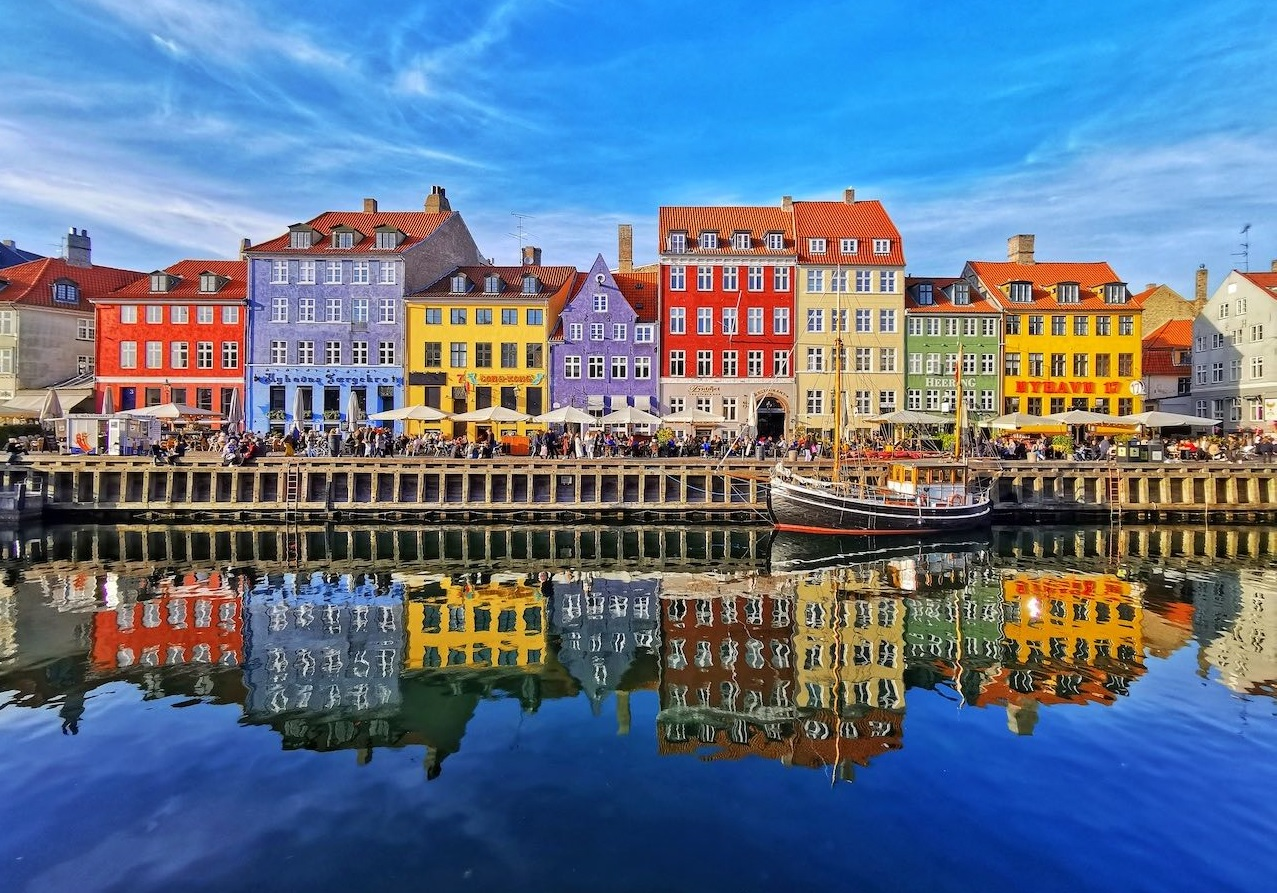

In [268]:
Image(filename='Copenhague.jpg' , width=1100) 

* Imagen: @avistu

¿Qué es Airbnb?

Airbnb es una compañía que ofrece una plataforma digital dedicada a la oferta de alojamientos particulares y turísticos (alquiler vacacional) mediante la cual los anfitriones pueden publicitar y contratar el arriendo de sus propiedades con sus huéspedes; anfitriones y huéspedes pueden valorarse mutuamente, como referencia para futuros usuarios.

Airbnb comenzó en la mente de tres emprendedores que han conseguido revolucionar la industria turística. La plataforma de alquiler, que comenzó en 2008, ya opera en más de 65 mil ciudades en las que más de 200 millones de huéspedes utilizan sus servicios. Sus anuncios superan los 3 millones en todo el mundo, lo que suponen actividades económicas importantes dentro del sector turístico.

1 . RECOPILACIÓN Y CARGA DE DATOS:

- Descargamos los ficheros de la página de Airbnb http://insideairbnb.com/get-the-data

In [98]:
# Descargamos los ficheros csv de Airbnb a través de comandos de Linux:

import wget

wget.download('http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2022-09-24/data/listings.csv.gz')
wget.download('http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2022-09-24/data/calendar.csv.gz')
wget.download('http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2022-09-24/data/reviews.csv.gz')
wget.download('http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2022-09-24/visualisations/listings.csv')
wget.download('http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2022-09-24/visualisations/reviews.csv')
wget.download('http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2022-09-24/visualisations/neighbourhoods.csv')
wget.download('http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2022-09-24/visualisations/neighbourhoods.geojson')

'neighbourhoods.geojson'

El conjunto de datos contiene un total de 7 archivos: 

En ellos tenemos archivos de descripción general para visualizaciones y otro conjunto de datos como 'listings' que son los anuncios, se han obtenido datos a fecha septiembre de 2022.

In [2]:
# Listado de nuestro directorio activo :

print(os.listdir("Trabajo Airbnb"))

['calendar.csv.gz', 'listings.csv', 'listings.csv.gz', 'neighbourhoods.csv', 'neighbourhoods.geojson', 'reviews.csv', 'reviews.csv.gz']


1.1.- LECTURA DE ARCHIVOS:

In [526]:
# Leemos los ficheros csv comprimidos gz:

listings_details= pd.read_csv(r'C:\VSCode\samplerepo\MÓDULO 2\16-Data StoryTelling\Trabajo Airbnb\listings.csv.gz', compression='gzip', index_col= "id", low_memory=False ) # convertimos en índice la columna 'id'
reviews_details= pd.read_csv(r'C:\VSCode\samplerepo\MÓDULO 2\16-Data StoryTelling\Trabajo Airbnb\reviews.csv.gz', compression='gzip', parse_dates=['date']) 
calendar=pd.read_csv(r'C:\VSCode\samplerepo\MÓDULO 2\16-Data StoryTelling\Trabajo Airbnb\calendar.csv.gz', compression='gzip',parse_dates=['date'], index_col=['listing_id'])

# parse_dates= Esta línea de código se utiliza para indicar que una columna determinada en un archivo CSV debe ser tratada como una fecha.

In [527]:
# Leemos los ficheros csv:

listings=pd.read_csv(r'C:\VSCode\samplerepo\MÓDULO 2\16-Data StoryTelling\Trabajo Airbnb\listings.csv',index_col= "id") # convertimos en índice la columna'id'
reviews=pd.read_csv(r'C:\VSCode\samplerepo\MÓDULO 2\16-Data StoryTelling\Trabajo Airbnb\reviews.csv')
barrios=pd.read_csv(r'C:\VSCode\samplerepo\MÓDULO 2\16-Data StoryTelling\Trabajo Airbnb\neighbourhoods.csv')

In [482]:
# Leemos el archivo geojson:

from pandas_geojson import read_geojson
geo_json = read_geojson(r'C:\VSCode\samplerepo\MÓDULO 2\16-Data StoryTelling\Trabajo Airbnb\neighbourhoods.geojson')

1.2 .-CONTENIDO DE LOS DATOS 

In [40]:
listings.shape

(13815, 17)

In [41]:
listings_details.shape

(13815, 74)

In [42]:
reviews.shape

(256560, 2)

In [43]:
reviews_details.shape

(256560, 6)

In [44]:
calendar.shape

(5042121, 6)

In [45]:
barrios.shape

(11, 2)

- Comprobamos los datos que contienen:

In [318]:
listings.head() 

# 'listings' nos aporta información acerca de :
# nombre del airbnb
# nombre del host 
# barrio 
# ùbicación
# tipo de habitación
# precio
# minimo de noches 
# reviews

name  host_id host_name  \
id                                                                            
6983                                Copenhagen 'N Livin'    16774     Simon   
26057                Lovely house - most attractive area   109777      Kari   
26473          City Centre Townhouse Sleeps 1-10 persons   112210     Julia   
29118                    Best Location in Cool Istedgade   125230      Nana   
31094  Beautiful, spacious, central, renovated Penthouse   129976      Ebbe   

       neighbourhood_group              neighbourhood   latitude  longitude  \
id                                                                            
6983                   NaN                    Nrrebro  55.686410  12.547410   
26057                  NaN                   Indre By  55.693070  12.576490   
26473                  NaN                   Indre By  55.676020  12.575400   
29118                  NaN  Vesterbro-Kongens Enghave  55.670230  12.555040   
31094                  NaN  Vesterbro-Kongens Enghave  55.666602  12.555283   

             room_type  price  minimum_nights  number_of_reviews last_review  \
id                                                                             
6983   Entire home/apt    898               3                172  2022-06-21   
26057  Entire home/apt   2600               4                 59  2022-08-09   
26473  Entire home/apt   3250               3                300  2022-09-10   
29118  Entire home/apt    725               7                 24  2022-08-04   
31094  Entire home/apt   1954               3                 19  2022-08-22   

       reviews_per_month  calculated_host_listings_count  availability_365  \
id                                                                           
6983                1.08                               1                 0   
26057               0.55                               1               303   
26473               2.06                               3                56   
29118               0.16                               1                59   
31094               0.13                               1                 0   

       number_of_reviews_ltm  license  
id                                     
6983                       4      NaN  
26057                      8      NaN  
26473                      7      NaN  
29118                      2      NaN  
31094                      2      NaN

In [171]:
listings.columns # Listings tiene 17 variables 

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [172]:
listings.info() # ya podemos comprobar que tenemos nulos 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13815 entries, 6983 to 648436253362373119
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            13815 non-null  object 
 1   host_id                         13815 non-null  int64  
 2   host_name                       13814 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   13815 non-null  object 
 5   latitude                        13815 non-null  float64
 6   longitude                       13815 non-null  float64
 7   room_type                       13815 non-null  object 
 8   price                           13815 non-null  int64  
 9   minimum_nights                  13815 non-null  int64  
 10  number_of_reviews               13815 non-null  int64  
 11  last_review                     12170 non-null  object 
 12  reviews_per_mont

In [319]:
listings_details.head() # 'listing_details' nos aporta información más detallada sobre descripción del barrio y reviews

listing_url       scrape_id last_scraped  \
id                                                                       
6983    https://www.airbnb.com/rooms/6983  20220924142144   2022-09-24   
26057  https://www.airbnb.com/rooms/26057  20220924142144   2022-09-25   
26473  https://www.airbnb.com/rooms/26473  20220924142144   2022-09-25   
29118  https://www.airbnb.com/rooms/29118  20220924142144   2022-09-25   
31094  https://www.airbnb.com/rooms/31094  20220924142144   2022-09-24   

                source                                               name  \
id                                                                          
6983   previous scrape                               Copenhagen 'N Livin'   
26057      city scrape                Lovely house - most attractive area   
26473      city scrape          City Centre Townhouse Sleeps 1-10 persons   
29118      city scrape                    Best Location in Cool Istedgade   
31094  previous scrape  Beautiful, spacious, central, renovated Penthouse   

                                             description  \
id                                                         
6983   Lovely apartment located in the hip Nørrebro a...   
26057  Our lovely house in the center of the city is ...   
26473  GUESTHOUSE ON KNABROSTRÆDE - located in the ab...   
29118  <b>The space</b><br />The apartment is situate...   
31094  Welcome to our home, we hope you will enjoy Wo...   

                                   neighborhood_overview  \
id                                                         
6983   Nice bars and cozy cafes just minutes away, ye...   
26057  The neighborhood is the most famous one and th...   
26473                                                NaN   
29118                                                NaN   
31094  What else is nearby?<br />To be honest, We thi...   

                                             picture_url  host_id  \
id                                                                  
6983   https://a0.muscache.com/pictures/42044170/f63c...    16774   
26057  https://a0.muscache.com/pictures/miso/Hosting-...   109777   
26473  https://a0.muscache.com/pictures/8e132ba0-b68c...   112210   
29118  https://a0.muscache.com/pictures/b83c7003-367a...   125230   
31094  https://a0.muscache.com/pictures/miso/Hosting-...   129976   

                                       host_url  ...  \
id                                               ...   
6983    https://www.airbnb.com/users/show/16774  ...   
26057  https://www.airbnb.com/users/show/109777  ...   
26473  https://www.airbnb.com/users/show/112210  ...   
29118  https://www.airbnb.com/users/show/125230  ...   
31094  https://www.airbnb.com/users/show/129976  ...   

      review_scores_communication review_scores_location review_scores_value  \
id                                                                             
6983                         4.89                   4.73                4.71   
26057                        4.86                   4.94                4.81   
26473                        4.70                   4.89                4.59   
29118                        5.00                   4.87                4.80   
31094                        4.82                   4.80                4.53   

      license instant_bookable calculated_host_listings_count  \
id                                                              
6983      NaN                f                              1   
26057     NaN                f                              1   
26473     NaN                f                              3   
29118     NaN                f                              1   
31094     NaN                f                              1   

      calculated_host_listings_count_entire_homes  \
id                                                  
6983                                            1   
26057                                           1   
26473                  

In [174]:
listings_details.columns # podemos ya comprobar que tiene un gran número de columnas, más adelante nos quedaremos solo con las necesarias.

Index(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar

In [175]:
listings_details.info() # ya podemos comprobar que tenemos nulos , y 74 variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13815 entries, 6983 to 648436253362373119
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   13815 non-null  object 
 1   scrape_id                                     13815 non-null  int64  
 2   last_scraped                                  13815 non-null  object 
 3   source                                        13815 non-null  object 
 4   name                                          13815 non-null  object 
 5   description                                   13452 non-null  object 
 6   neighborhood_overview                         6975 non-null   object 
 7   picture_url                                   13815 non-null  object 
 8   host_id                                       13815 non-null  int64  
 9   host_url                                     

In [176]:
reviews.head() # ya podemos ver que hay una columna con dato tipo fecha 

listing_id        date
0      406081  2022-07-25
1      666188  2013-07-24
2      666188  2014-04-17
3      666188  2014-08-04
4      409625  2012-04-28

In [177]:
reviews.info() # podemos ver que no hay valores nulos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256560 entries, 0 to 256559
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  256560 non-null  int64 
 1   date        256560 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.9+ MB


In [178]:
reviews_details.head()

listing_id                  id       date  reviewer_id reviewer_name  \
0      406081  678806182273584966 2022-07-25    109349541       Leilani   
1      409625             1191845 2012-04-28      2084648         Laura   
2        6983                8985 2009-09-04        31133          Jeff   
3        6983                9199 2009-09-07        11472        Andrea   
4        6983               11763 2009-09-28        35317       Jeanine   

                                            comments  
0  Beautiful home, excellent location. Grocery st...  
1  Lars was a fantastic host - he was really help...  
2  Convenient location, clean apartment, great br...  
3  We really enjoyed staying to Simon in our firs...  
4  Friendly host, save neighbourhood, clean appar...

In [179]:
reviews_details.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256560 entries, 0 to 256559
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     256560 non-null  int64         
 1   id             256560 non-null  int64         
 2   date           256560 non-null  datetime64[ns]
 3   reviewer_id    256560 non-null  int64         
 4   reviewer_name  256560 non-null  object        
 5   comments       256548 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 11.7+ MB


In [180]:
calendar.head() # ya podemos ver que tenemos datos atípicos con el símbolo $

# calendar nos aporta datos como precio, y mínimo y máximo de noches

date available    price adjusted_price  minimum_nights  \
listing_id                                                                
6983       2022-09-24         f  $953.00        $953.00             3.0   
6983       2022-09-25         f  $877.00        $877.00             3.0   
6983       2022-09-26         f  $877.00        $877.00             3.0   
6983       2022-09-27         f  $877.00        $877.00             3.0   
6983       2022-09-28         f  $877.00        $877.00             3.0   

            maximum_nights  
listing_id                  
6983                  15.0  
6983                  15.0  
6983                  15.0  
6983                  15.0  
6983                  15.0

In [181]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5042121 entries, 6983 to 401665
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   available       object        
 2   price           object        
 3   adjusted_price  object        
 4   minimum_nights  float64       
 5   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 269.3+ MB


In [320]:
barrios # ya podemos ver que contiene una columna con datos nulos que no aporta infomación, y por tanto no la necesitamos.

# 'barrios' nos facilita información acerca del barrio donde se encuentra el airbnb .

neighbourhood_group              neighbourhood
0                   NaN                  Amager st
1                   NaN                Amager Vest
2                   NaN                 Bispebjerg
3                   NaN               Brnshj-Husum
4                   NaN              Frederiksberg
5                   NaN                   Indre By
6                   NaN                    Nrrebro
7                   NaN                    sterbro
8                   NaN                      Valby
9                   NaN                     Vanlse
10                  NaN  Vesterbro-Kongens Enghave

In [321]:
barrios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        11 non-null     object 
dtypes: float64(1), object(1)
memory usage: 304.0+ bytes


Como vimos antes , en 'listings_details' tenemos una gran cantidad de columnas, que no necesitamos, hay 74 variables ;

- Vamos a seleccionar las que vamos a usar y a unirlas con el dataset 'listings':

In [528]:
# Seleccionamos las columnas que queremos de 'listings_details':

target_columns = ['property_type', 'accommodates', 'first_review', 'review_scores_value', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_accuracy', 'review_scores_communication', 'review_scores_checkin', 'review_scores_rating', 'maximum_nights', 'listing_url', 'host_is_superhost', 'host_about', 'host_response_time', 'host_response_rate'] 

# Unimos las columnas de 'listings_details' a 'listings':

listings = pd.merge(listings, listings_details[target_columns], on='id', how='left') 
# on: por que columna unirá los datos, how= por donde filtrará los datos, solo por el df de la izda.

In [529]:
# Comprobamos como ha quedado 'listings'

listings.info() # tenemos ahora 33 columnas, las 17 que teneíamos en 'listings' más las que hemos añadido de 'listings_details

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13815 entries, 6983 to 648436253362373119
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            13815 non-null  object 
 1   host_id                         13815 non-null  int64  
 2   host_name                       13814 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   13815 non-null  object 
 5   latitude                        13815 non-null  float64
 6   longitude                       13815 non-null  float64
 7   room_type                       13815 non-null  object 
 8   price                           13815 non-null  int64  
 9   minimum_nights                  13815 non-null  int64  
 10  number_of_reviews               13815 non-null  int64  
 11  last_review                     12170 non-null  object 
 12  reviews_per_mont

In [530]:
listings.head()

name  host_id host_name  \
id                                                                            
6983                                Copenhagen 'N Livin'    16774     Simon   
26057                Lovely house - most attractive area   109777      Kari   
26473          City Centre Townhouse Sleeps 1-10 persons   112210     Julia   
29118                    Best Location in Cool Istedgade   125230      Nana   
31094  Beautiful, spacious, central, renovated Penthouse   129976      Ebbe   

       neighbourhood_group              neighbourhood   latitude  longitude  \
id                                                                            
6983                   NaN                    Nrrebro  55.686410  12.547410   
26057                  NaN                   Indre By  55.693070  12.576490   
26473                  NaN                   Indre By  55.676020  12.575400   
29118                  NaN  Vesterbro-Kongens Enghave  55.670230  12.555040   
31094                  NaN  Vesterbro-Kongens Enghave  55.666602  12.555283   

             room_type  price  minimum_nights  ...  review_scores_accuracy  \
id                                             ...                           
6983   Entire home/apt    898               3  ...                    4.79   
26057  Entire home/apt   2600               4  ...                    4.93   
26473  Entire home/apt   3250               3  ...                    4.63   
29118  Entire home/apt    725               7  ...                    4.87   
31094  Entire home/apt   1954               3  ...                    4.82   

      review_scores_communication  review_scores_checkin  \
id                                                         
6983                         4.89                   4.86   
26057                        4.86                   4.93   
26473                        4.70                   4.78   
29118                        5.00                   5.00   
31094                        4.82                   4.87   

       review_scores_rating  maximum_nights  \
id                                            
6983                   4.78              15   
26057                  4.91            1125   
26473                  4.53              31   
29118                  4.92              14   
31094                  4.88              10   

                              listing_url  host_is_superhost  \
id                                                             
6983    https://www.airbnb.com/rooms/6983                  f   
26057  https://www.airbnb.com/rooms/26057                  f   
26473  https://www.airbnb.com/rooms/26473                  f   
29118  https://www.airbnb.com/rooms/29118                  f   
31094  https://www.airbnb.com/rooms/31094                  f   

                                              host_about  host_response_time  \
id                                                                             
6983   I'm currently working as an environmental cons...  within a few hours   
26057  We are a family with 2 children, and living in...  within a few hours   
26473  Active young woman, started as an expat in Cop...      within an hour   
29118  I have a Master of Arts in Musicology and I wo...  within a few hours   
31094  Hi and welcome. My name is Ebbe, I am a medica...        within a day   

      host_response_rate  
id                        
6983                100%  
26057               100%  
26473               100%  
29118               100%  
31094               100%  

[5 rows x 33 columns]

2 . LIMPIEZA DE DATOS

- Vamos a comprobar la calidad del dato que tenemos en cada dataset

 - Reparamos valores nulos y faltantes

En un primer análisis de 'listings', podemos ver que hay dos columnas en las que no tenemos valores útiles, ya que son todo nulos:
neighbourhood_group' y 'license', por tanto vamos a eliminarlas para poder continuar:

In [531]:
listings = listings.drop(columns=['neighbourhood_group', 'license']) # eliminamos las columnas indicadas

In [532]:
# Comprobamos ahora 'listings' :

listings.info() # comprobamos que estas columnas se han eliminado 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13815 entries, 6983 to 648436253362373119
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            13815 non-null  object 
 1   host_id                         13815 non-null  int64  
 2   host_name                       13814 non-null  object 
 3   neighbourhood                   13815 non-null  object 
 4   latitude                        13815 non-null  float64
 5   longitude                       13815 non-null  float64
 6   room_type                       13815 non-null  object 
 7   price                           13815 non-null  int64  
 8   minimum_nights                  13815 non-null  int64  
 9   number_of_reviews               13815 non-null  int64  
 10  last_review                     12170 non-null  object 
 11  reviews_per_month               12170 non-null  float64
 12  calculated_host_

In [533]:
# Comprobamos el porcentaje de valores nulos que contiene ahora'listings': 

listings_nulls=listings.isnull().sum() *100/len(listings)
listings_nulls.sort_values(ascending=False)

host_about                        50.452407
host_response_rate                27.166124
host_response_time                27.166124
review_scores_location            12.225841
review_scores_checkin             12.218603
review_scores_cleanliness         12.218603
review_scores_accuracy            12.218603
review_scores_communication       12.218603
review_scores_value               12.218603
first_review                      11.907347
last_review                       11.907347
reviews_per_month                 11.907347
review_scores_rating              11.907347
host_is_superhost                  0.014477
host_name                          0.007239
maximum_nights                     0.000000
listing_url                        0.000000
name                               0.000000
accommodates                       0.000000
host_id                            0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count  

- Comprobamos que en la columna 'host_about' tenemos un 50 % de nulos, el contenido de la misma es una descripción personal que hace cada host,
por lo que este dato no nos aporta información útil para el análisis, procedemos a eliminarla:

In [534]:
listings=listings.drop('host_about',axis=1) # eliminamos la columna indicada y salvamos el nuevo df
listings

name  \
id                                                                      
6983                                             Copenhagen 'N Livin'   
26057                             Lovely house - most attractive area   
26473                       City Centre Townhouse Sleeps 1-10 persons   
29118                                 Best Location in Cool Istedgade   
31094               Beautiful, spacious, central, renovated Penthouse   
...                                                               ...   
653494030951422457  Top-floor Villa Apartment in the Heart of Hell...   
647809303952891559  Dejligt lille hus med flere hyggekroge ude og ...   
650819220455514228  Lejlighed i Storkøbenhavn. 13 minutter fra cen...   
658612163688161695     Cosy apartment with a great view in Copenhagen   
648436253362373119     Big Bedroom connected with a large living room   

                      host_id host_name              neighbourhood   latitude  \
id                                                                              
6983                    16774     Simon                    Nrrebro  55.686410   
26057                  109777      Kari                   Indre By  55.693070   
26473                  112210     Julia                   Indre By  55.676020   
29118                  125230      Nana  Vesterbro-Kongens Enghave  55.670230   
31094                  129976      Ebbe  Vesterbro-Kongens Enghave  55.666602   
...                       ...       ...                        ...        ...   
653494030951422457  465189427   Martine                    sterbro  55.732840   
647809303952891559    4862421  Kathrine                      Valby  55.667782   
650819220455514228  134647873       Tim                      Valby  55.659536   
658612163688161695  256903668       Sam               Brnshj-Husum  55.730971   
648436253362373119  141288846     Tanja                 Bispebjerg  55.731420   

                    longitude        room_type  price  minimum_nights  \
id                                                                      
6983                12.547410  Entire home/apt    898               3   
26057               12.576490  Entire home/apt   2600               4   
26473               12.575400  Entire home/apt   3250               3   
29118               12.555040  Entire home/apt    725               7   
31094               12.555283  Entire home/apt   1954               3   
...                       ...              ...    ...             ...   
653494030951422457  12.572370  Entire home/apt   1250              14   
647809303952891559  12.463285  Entire home/apt    450               3   
650819220455514228  12.474726  Entire home/apt    400               1   
658612163688161695  12.487993  Entire home/apt    850               1   
648436253362373119  12.521770     Private room    420               2   

                    number_of_reviews  ... review_scores_location  \
id                                     ...                          
6983                              172  ...                   4.73   
26057                              59  ...                   4.94   
26473                             300  ...                   4.89   
29118                              24  ...                   4.87   
31094                              19  ...                   4.80   
...                               ...  ...                    ...   
653494030951422457                  0  ...                    NaN   
647809303952891559                  3  ...                   4.67   
650819220455514228                  3  ...                   4.67   
658612163688161695                  0  ...                    NaN   
648436253362373119                  1  ...                   5.00   

                    review_scores_accuracy  review_scores_communication  \
id                                                                        
6983                                  4.79                     

- La columna 'host_response_rate' contiene un 27 % de valores nulos:
 Esta columna nos indica el ratio de respuesta del host (anfitrión) indicado en porcentaje; por lo que este dato nulo nos puede aportar información relevante acerca de ese host.

In [535]:
# Al ser una columna que contiene una variable cuantitativa discreta (el porcentaje solo puede ser 0 o 100: contesta o no) vamos a reemplazar 
# el valor NAN por el valor cero:

listings['host_response_rate']=listings['host_response_rate'].fillna(0) 
listings['host_response_rate'].isnull().sum() # comprobamos que ya no tenemos valores faltantes.

0

- La columna 'host_response_time' que también contiene un 27 % de valores nulos, indica el tiempo de respuesta que tarda un host en contestar 
a los anuncios, por lo que este dato aún siendo nulo también nos aporta información relevante acerca de ese host.

In [536]:
# Al ser una columna que contiene una variable cualitativa categórica ordinal ( contiene valores que pueden ser ordenados de menor a mayor: 
# "within a few minutes" , "within an hour" , "within a few hours") vamos a reemplazarlo por el valor NONE:


listings['host_response_time']=listings['host_response_time'].fillna('None')
listings['host_response_time'].isnull().sum()   # comprobamos que ya no tenemos valores faltantes 

0

- Comprobamos el resto de columnas con un porcentaje de nulos del 12 % y 11 % , las columnas 'reviews', estas contienen puntuaciones , por lo que son
datos relevantes para el usuario final:

In [537]:
# Son variables numéricas cuantitativas continuas: los valores pueden tener cualquier número dentro de un rango del 1-5):

listings[['review_scores_location','review_scores_checkin','review_scores_cleanliness','review_scores_accuracy','review_scores_communication','review_scores_value']] 

# Trabajaremos con estos datos, puesto que no podemos reemplazar las puntuaciones por otros valores como la media, ya que esto desvirtuaría la 
# información más importante.


review_scores_location  review_scores_checkin  \
id                                                                  
6983                                  4.73                   4.86   
26057                                 4.94                   4.93   
26473                                 4.89                   4.78   
29118                                 4.87                   5.00   
31094                                 4.80                   4.87   
...                                    ...                    ...   
653494030951422457                     NaN                    NaN   
647809303952891559                    4.67                   5.00   
650819220455514228                    4.67                   5.00   
658612163688161695                     NaN                    NaN   
648436253362373119                    5.00                   5.00   

                    review_scores_cleanliness  review_scores_accuracy  \
id                                                                      
6983                                     4.78                    4.79   
26057                                    4.96                    4.93   
26473                                    4.44                    4.63   
29118                                    4.73                    4.87   
31094                                    4.88                    4.82   
...                                       ...                     ...   
653494030951422457                        NaN                     NaN   
647809303952891559                       5.00                    5.00   
650819220455514228                       4.67                    5.00   
658612163688161695                        NaN                     NaN   
648436253362373119                       5.00                    5.00   

                    review_scores_communication  review_scores_value  
id                                                                    
6983                                       4.89                 4.71  
26057                                      4.86                 4.81  
26473                                      4.70                 4.59  
29118                                      5.00                 4.80  
31094                                      4.82                 4.53  
...                                         ...                  ...  
653494030951422457                          NaN                  NaN  
647809303952891559                         5.00                 5.00  
650819220455514228                         5.00                 5.00  
658612163688161695                          NaN                  NaN  
648436253362373119                         5.00                 5.00  

[13815 rows x 6 columns]

- Comprobamos la calidad del dato final en 'listings' en el siguiente gráfico:

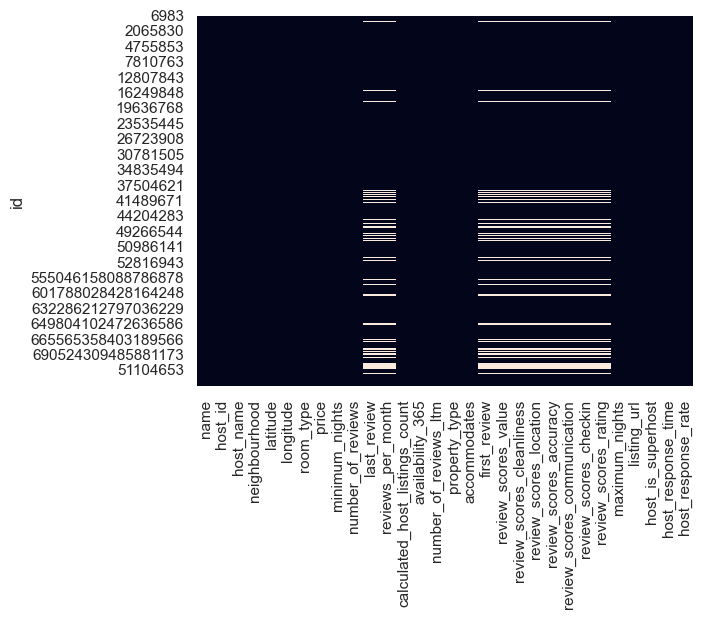

In [334]:
sns.heatmap(listings.isnull(), cbar=False);

- Continuamos con la limpieza de datos en el resto de datasets que tenemos:

In [492]:
# Comprobamos 'reviews':

reviews.isnull().sum().sum() # no tenemos valores nulos

0

In [493]:
# Comprobamos 'reviews_details':

reviews_details.isnull().sum() # vemos que tenemos algunos nulos en 'comentarios', un dato nada significativo, y que además no vamos a analizar.

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         12
dtype: int64

In [494]:
# Comprobamos 'calendar':  

calendar_nulls=calendar.isnull().sum() *100/len(calendar)
calendar_nulls.sort_values(ascending=False)


minimum_nights    0.013586
maximum_nights    0.013586
date              0.000000
available         0.000000
price             0.000000
adjusted_price    0.000000
dtype: float64

In [538]:
# Comprobamos 'barrios':

barrios.isnull() 

neighbourhood_group  neighbourhood
0                  True          False
1                  True          False
2                  True          False
3                  True          False
4                  True          False
5                  True          False
6                  True          False
7                  True          False
8                  True          False
9                  True          False
10                 True          False

Como vimos antes tenemos una columna entera que no aporta ninguna información, con totalidad de nulos, 'neighbourhood_group',
y cuya columna identificativa también la anulamos en 'listings' , por lo que ya no tiene sentido tenerla aquí ; procedemos a eliminarla.

In [539]:
barrios=barrios.drop('neighbourhood_group',axis=1) # Eliminamos la columna y salvamos el nuevo df
barrios

neighbourhood
0                   Amager st
1                 Amager Vest
2                  Bispebjerg
3                Brnshj-Husum
4               Frederiksberg
5                    Indre By
6                     Nrrebro
7                     sterbro
8                       Valby
9                      Vanlse
10  Vesterbro-Kongens Enghave

- Tras comprobar los datos nulos que no necesitábamos vamos a ver si tenemos OUTLIERS y/o valores atípicos.

- Comprobaremos este dato a través de gráficos: 

 -El mejor gráfico para ver Outliers, es un gráfico boxplot, lo vemos a continuación con el dataset 'calendar':

In [540]:
calendar.head() # un dato importante que este dataset nos ofrece es el número máximo y mínimo de noches requeridas para el alojamiento:

date available    price adjusted_price  minimum_nights  \
listing_id                                                                
6983       2022-09-24         f  $953.00        $953.00             3.0   
6983       2022-09-25         f  $877.00        $877.00             3.0   
6983       2022-09-26         f  $877.00        $877.00             3.0   
6983       2022-09-27         f  $877.00        $877.00             3.0   
6983       2022-09-28         f  $877.00        $877.00             3.0   

            maximum_nights  
listing_id                  
6983                  15.0  
6983                  15.0  
6983                  15.0  
6983                  15.0  
6983                  15.0

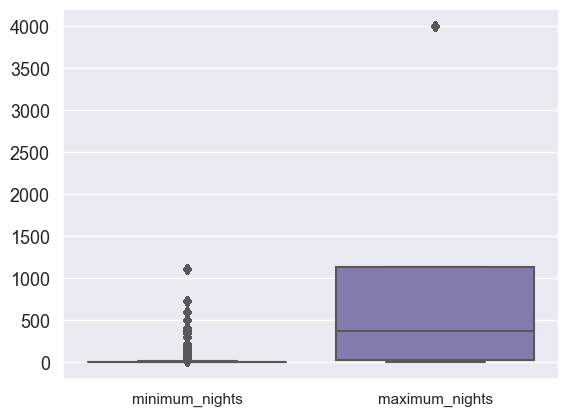

In [206]:
sns.boxplot(calendar, color='m');  # aquí el gráfico tomará las variables numéricas 'minimum_night' y 'maximum_nights': 

Vemos como hay algunos valores que se encuentran fuera de los límites definidos por el punto máximo de ambas variables, algún alojamiento
tiene un elevado número mínimo de noches (1111) y otro un elevado número de noches máximas (4000) , por lo que no podemos descartar que se trate
de anuncios erróneos.

In [498]:
# Testeamos estos datos:

calendar[['minimum_nights', 'maximum_nights']].max()

minimum_nights    1111.0
maximum_nights    4000.0
dtype: float64

In [499]:
# Comprobamos estos anuncios en el dataset:

listings[(listings['minimum_nights']==1111)]

name  host_id host_name neighbourhood  \
id                                                                              
2024710  Perfect Location Close 2 everything  7979719      Emil       Nrrebro   

         latitude  longitude        room_type  price  minimum_nights  \
id                                                                     
2024710  55.69022   12.56523  Entire home/apt    950            1111   

         number_of_reviews  ... review_scores_location  \
id                          ...                          
2024710                 57  ...                   4.89   

         review_scores_accuracy  review_scores_communication  \
id                                                             
2024710                    4.58                          4.8   

         review_scores_checkin  review_scores_rating maximum_nights  \
id                                                                    
2024710                   4.76                  4.57           1125   

                                  listing_url host_is_superhost  \
id                                                                
2024710  https://www.airbnb.com/rooms/2024710                 f   

         host_response_time  host_response_rate  
id                                               
2024710                None                   0  

[1 rows x 30 columns]

Comprobamos el anuncio real en Airbnb  a través de su url, https://www.airbnb.com/rooms/2024710 , el anuncio es correcto pero no parece seguir activo.

In [209]:
# Comprobamos ahora los anuncios con outliers en máximo de noches:

listings[(listings['maximum_nights']==4000)]

name   host_id      host_name neighbourhood  \
id                                                                            
1343696     Bright central penthouse   7287527  Esben & Sarah     Amager st   
6553248  Cozy, new modern apartment.  34273955         Thomas       sterbro   

         latitude  longitude        room_type  price  minimum_nights  \
id                                                                     
1343696  55.66639   12.60580  Entire home/apt   2000               2   
6553248  55.70835   12.58528  Entire home/apt   1200               3   

         number_of_reviews  ... review_scores_location  \
id                          ...                          
1343696                 25  ...                   4.48   
6553248                  3  ...                   5.00   

         review_scores_accuracy  review_scores_communication  \
id                                                             
1343696                    4.81                          5.0   
6553248                    5.00                          5.0   

         review_scores_checkin  review_scores_rating maximum_nights  \
id                                                                    
1343696                    4.9                  4.71           4000   
6553248                    5.0                  4.67           4000   

                                  listing_url host_is_superhost  \
id                                                                
1343696  https://www.airbnb.com/rooms/1343696                 f   
6553248  https://www.airbnb.com/rooms/6553248                 f   

         host_response_time  host_response_rate  
id                                               
1343696        within a day                100%  
6553248        within a day                100%  

[2 rows x 30 columns]

Comprobamos estos anuncios a través de su url, https://www.airbnb.com/rooms/1343696 y https://www.airbnb.com/rooms/6553248 , son correctos, si bien 
es cierto que no podemos identificar el motivo de este dato.

- Para no desvirtuar un análisis posterior vamos a eliminar los tres anuncios, ya que podemos considerar que tienen datos erróneos:

In [541]:
listings.drop(index=2024710, axis=0, inplace=True) # eliminamos las filas según el id del anuncio en'listings' y 'calendar'
calendar.drop(index=2024710, axis=0, inplace=True)


In [542]:
listings.drop(index=1343696, axis=0, inplace=True) 
calendar.drop(index=1343696, axis=0, inplace=True)

In [543]:
listings.drop(index=6553248, axis=0, inplace=True) 
calendar.drop(index=6553248, axis=0, inplace=True)

Vemos el resultado en un gráfico boxplot :

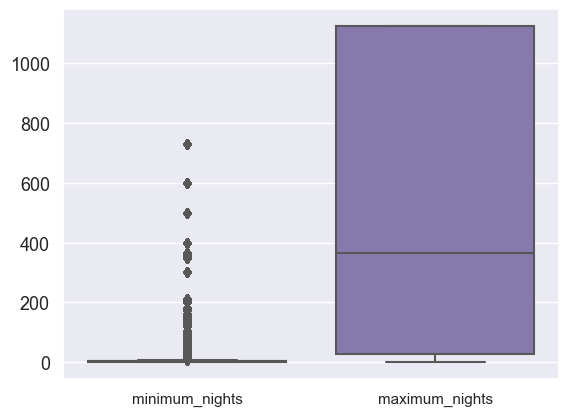

In [213]:
sns.boxplot(calendar, color='m'); # comprobamos ahora una mejor distribución de nuestros datos en 'calendar' sin outliers

3. ANÁLISIS

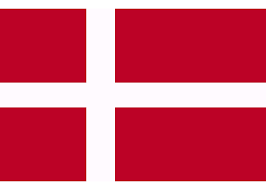

In [637]:
Image(filename='bandera_dinamarca.png',width=700)

3.1. ANÁLISIS POR VECINDARIO

- Analizamos la cantidad de anuncios por vecindarios:

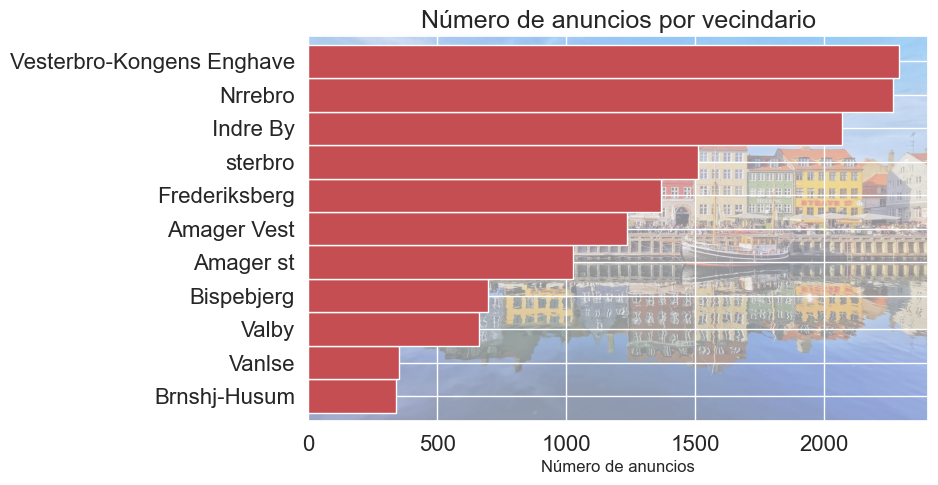

In [604]:
# Definición de la imagen

image = mpimg.imread('Copenhague.jpg')

# Creación de la figura y los ejes

fig, ax = plt.subplots()
feq=listings['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(8, 5), color='r', width=1)

# Generación de las variables con los límites de los ejes x e y

x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()

# Integración de la imagen en el gráfico, con un grado de transparencia y un ratio de aspecto automático

ax.imshow(image, extent=[x0, x1, y0, y1], aspect='auto', alpha=0.4)

plt.title("Número de anuncios por vecindario", fontsize=18)
plt.xlabel('Número de anuncios', fontsize=12)
plt.show() 

La mayor cantidad de anuncios se encuentran en el barrio de Vesterbro: 

-- Es el barrio más moderno de la ciudad, una zona animada de vida nocturna, donde algunas de sus calles, cafés y restaurantes, rememoran a París.

Le sigue el barrio de Nørrebro :

-- Es un barrio que destaca por su multiculturalidad y por su ambiente alternativo. En este barrio destaca el cementerio Assistens Kirkegaard, un cementerio que funciona como parque público.

Como tercer barrio con más anuncios tenemos a Indre By: 

-- Es el centro de Copenhague. Abarca el puerto Nyhavn, con sus embarcaciones, fachadas de colores, y la famosa estatua de la Sirenita en una piedra en la isla(que mostraremos a continuación).

Por último, donde menos anuncios tenemos es el barrio de Husum:

-- Es una zona suburbana tranquila.

- Filtramos para ver solo los barrios donde hay más de 1000 anuncios y por tanto, es mejor hospedarse:

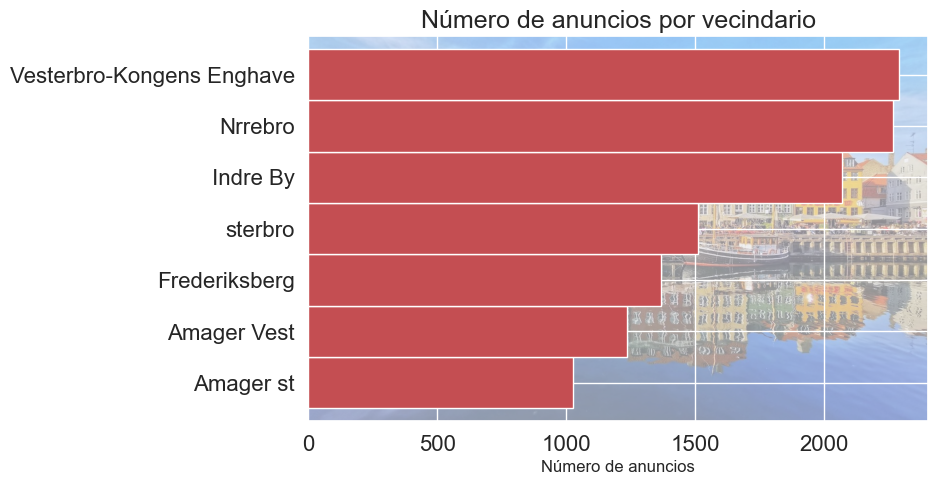

In [605]:
image = mpimg.imread('Copenhague.jpg')
fig, ax = plt.subplots()

feq=listings['neighbourhood'].value_counts().sort_values(ascending=True)
feq=feq[feq>1000]
feq.plot.barh(figsize=(8, 5), color='r', width=1)

x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.imshow(image, extent=[x0, x1, y0, y1], aspect='auto', alpha=0.4)

plt.title("Número de anuncios por vecindario", fontsize=18)
plt.xlabel('Número de anuncios', fontsize=12)
plt.show()

Podemos ver que hemos descartado los barrios de Valby, Vanlse y Husum, entre otros, que como decíamos antes, son barrios periféricos alejados del centro .

Mostramos uno de los lugares más representativos de la ciudad y el más visitado de Dinamarca , La Sirenita de Copenhague, situada en unos de los barrios con más número de anuncios: Indre By, que como veremos más adelante, es también el más caro:

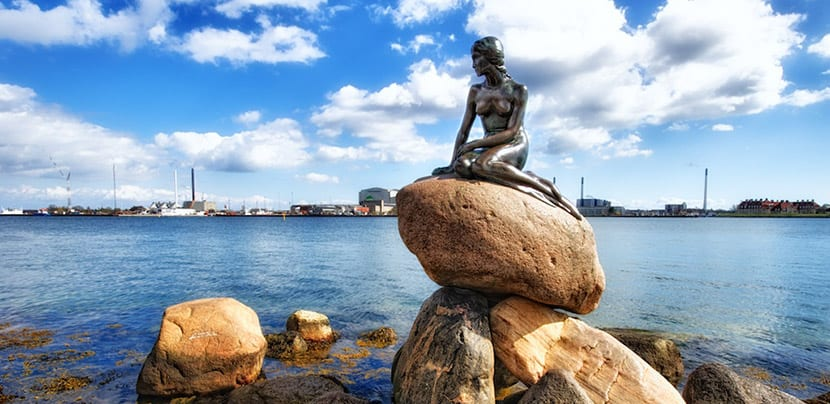

In [614]:
Image(filename='la-sirenita-de-copenhagen.jpg',width=1000)

Imagen: https://www.actualidadviajes.com/la-sirenita-de-copenhague/

- Podemos ver a continuación,  un mapa y comprobar que la mayoría de los anuncios están en el centro de la ciudad. 

Este mapa es interactivo y puede ampliar los grupos para encontrar las ubicaciones individuales de los anuncios por barrios.

In [93]:
lats2018 = listings['latitude'].tolist()
lons2018 = listings['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[55.66344228657138, 12.554676008955472], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

3.2 . ANÁLISIS POR TIPOS DE PROPIEDADES Y HABITACIONES

3.2.1.ANALIZAMOS POR TIPOS DE HABITACIONES :

* LEGISLACIÓN SOBRE ALQUILER EN DINAMARCA Y ACUERDO PIONERO CON AIRBNB:

Airbnb firmó un acuerdo con Dinamarca en 2019 para simplificar el pago de impuestos por alquiler y 'home sharing'.

Bajo esta nueva regulación pionera en todo el mundo, aquellos que compartan sus hogares a través de plataformas que colaboran con el Gobierno y que cedan sus datos para asegurar el cumplimiento fiscal, disfrutarán de "mayores límites de alojamiento temporales y exenciones fiscales".

En concreto, las nuevas normas regulan que los propietarios puedan compartir hogares primarios completos de 70 a 100 noches al año, en comparación con 30 noches en plataformas que no comparten datos con el Gobierno. En cuanto a las habitaciones privadas y las casas de verano no existe límite de días.

Leer más sobre este acuerdo:

https://www.europapress.es/economia/red-empresas-00953/noticia-airbnb-firma-acuerdo-dinamarca-simplificar-pago-impuestos-alquiler-home-sharing-20190404171429.html

En Dinamarca se exige además que todos los arrendatarios tenga un registro civil de la vivienda llamado CPR,  si no lo tiene significa que lo
están alquilando ilegalmente.

Leer más sobre la legislación del alquiler en Dinamarca: 

https://international.kk.dk/live/housing/finding-a-place-to-live/renting-tips

https://www.retsinformation.dk/eli/lta/2016/227

- Comprobamos el tipo de habitaciones que se alquilan en los anuncios publicados:

In [214]:
listings['room_type'].value_counts()

Entire home/apt    12227
Private room        1551
Shared room           19
Hotel room            15
Name: room_type, dtype: int64

Lo vemos mejor en el siguiente gráfico:

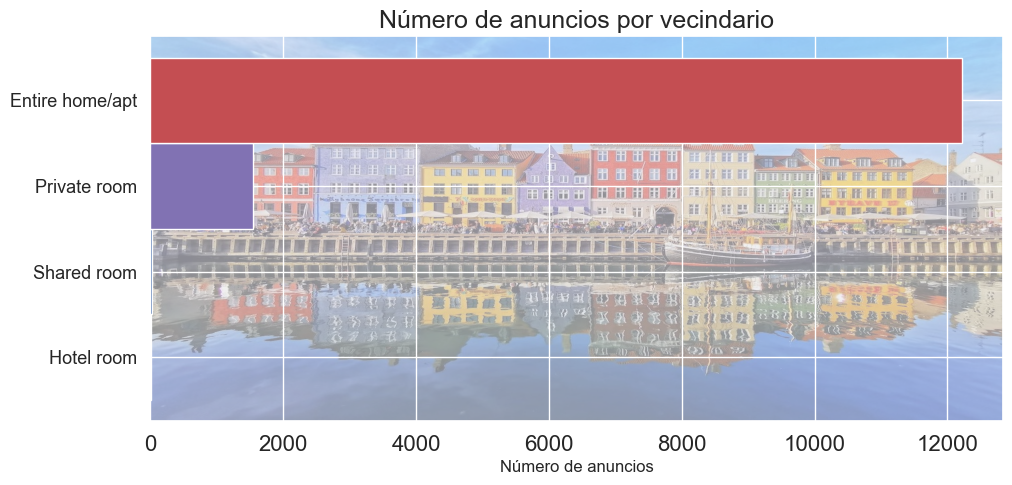

In [632]:
image = mpimg.imread('Copenhague.jpg')
fig, ax = plt.subplots()

freq = listings['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color = ["g","b","m","r"])

x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.imshow(image, extent=[x0, x1, y0, y1], aspect='auto', alpha=0.4)
fig.set_size_inches(11,5)

plt.title("Número de anuncios por vecindario", fontsize=18)
plt.xlabel('Número de anuncios', fontsize=12)
plt.show()

Vemos que la mayoría de anuncios que tenemos son apartamentos y casas enteras, es decir, se pueden alquilar durante un máximo
de 100 noches al año,  después habitaciones privadas, compartidas y hoteles , para los cuales no existe límite de días.

3.2.2 ANALIZAMOS POR TIPO DE PROPIEDADES

- Vamos a ver que tipo de propiedades tenemos:

In [215]:
listings.property_type.unique()

array(['Entire rental unit', 'Entire home', 'Entire townhouse',
       'Entire condo', 'Private room in rental unit',
       'Private room in condo', 'Entire loft',
       'Shared room in rental unit', 'Private room in home',
       'Entire villa', 'Private room in loft', 'Entire bungalow',
       'Private room in guest suite', 'Private room in townhouse', 'Boat',
       'Entire serviced apartment', 'Houseboat', 'Private room in villa',
       'Entire guesthouse', 'Private room in bed and breakfast',
       'Room in hostel', 'Barn', 'Private room in bungalow',
       'Entire cabin', 'Shared room in loft', 'Tiny home',
       'Private room in casa particular',
       'Private room in serviced apartment', 'Entire cottage',
       'Private room in hut', 'Private room in guesthouse',
       'Private room', 'Entire guest suite', 'Room in boutique hotel',
       'Room in serviced apartment', 'Private room in tiny home',
       'Shared room in bungalow', 'Entire vacation home',
       'Privat

Podemos ver que tenemos una gran variedad de propiedades de diferentes tipos.

Sin embargo, muchos de esos tipos de propiedades tienen muy pocos anuncios en Copenhague. 

A continuación, solo mostramos tipos de propiedades con al menos 200 anuncios. 
Como podemos ver, la gran mayoría de las propiedades en Copenhague son apartamentos.

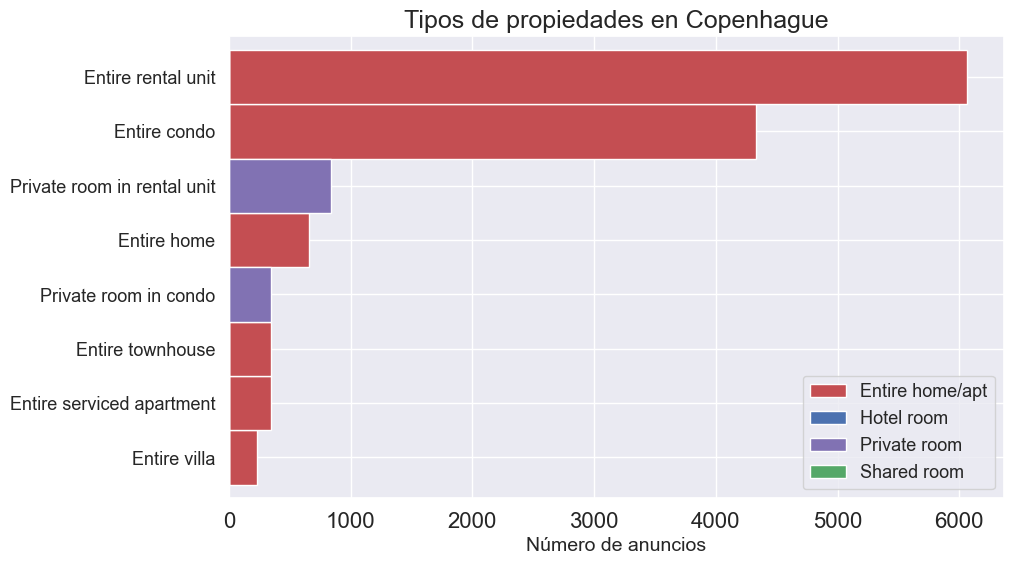

In [611]:
prop = listings.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=200]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","m","g"],linewidth = 1, grid=True, figsize=(10,6), width=1)

plt.title('Tipos de propiedades en Copenhague', fontsize=18)
plt.xlabel('Número de anuncios', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

3.3. ANÁLISIS POR NÚMERO DE ALOJADOS

- Vamos a analizar el número de alojados que requiere cada anuncio:

In [224]:
listings['accommodates'].value_counts()

2     5558
4     3240
3     1675
6     1180
5     1072
1      487
8      268
7      184
10      70
9       39
12      19
11      11
16       4
15       2
0        2
14       1
Name: accommodates, dtype: int64

In [217]:
listings['accommodates'].max() # el máximo de personas permitidas por Airbnb, 16.

16

Podemos ver que la mayoría de ellos requieren un mínimo de 2 personas e incluso 4 y como no tenemos apenas alojamientos para más de 10 personas, siendo muy pocos a partir de 6, no siendo Copenhague una ciudad dedicada al turismo masivo.

Lo vemos mejor en el siguiente gráfico:

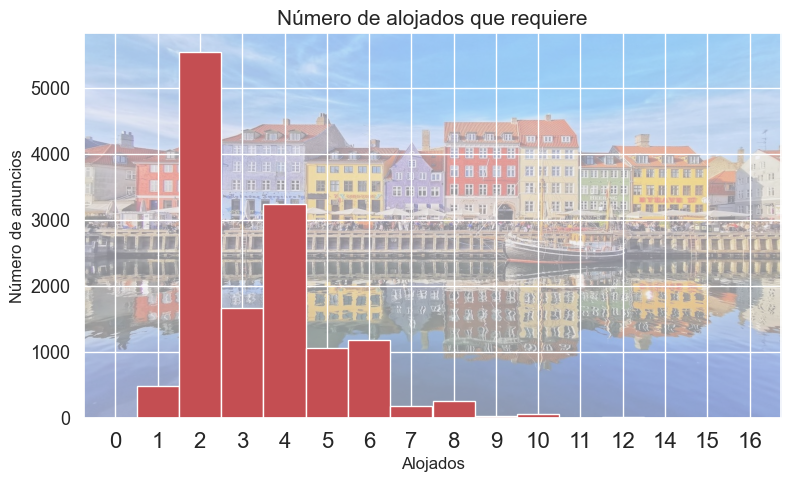

In [617]:
image = mpimg.imread('Copenhague.jpg')
fig, ax = plt.subplots()

feq=listings['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(9, 5), color='r', width=1, rot=0)


x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.imshow(image, extent=[x0, x1, y0, y1], aspect='auto', alpha=0.4)

plt.title("Número de alojados que requiere", fontsize=15)
plt.ylabel('Número de anuncios', fontsize=12)
plt.xlabel('Alojados', fontsize=12)
plt.show()

4. ANÁLISIS AL SERVICIO DEL TURISMO 

4.1. ANÁLISIS POR PRECIO MEDIO Y VECINDARIO 

Cabe destacar que Dinamarca , es país miembro de la UE desde 1973, pero optó por no integrarse en la zona del euro, su moneda es la corona danesa:

- 1 corona danesa equivale a 0,13 EUR y a 0,15 Dólar a fecha 22/01/2023

En nuestros datos los precios se ven reflejados como vimos en el dataset 'calendar' en dólares $.

In [503]:
listings['price'].describe() # vemos un primer análisis de precios

count    13812.000000
mean      1205.840429
std       1433.281209
min          0.000000
25%        729.000000
50%        995.000000
75%       1368.250000
max      64900.000000
Name: price, dtype: float64

Comprobamos un anuncio con un valor excesivamente elevado de 64900$ que no puede ser correcto, vamos a analizarlo:

In [504]:
listings[(listings['price']>=64000)] # filtramos por este anuncio en concreto:

name   host_id host_name  \
id                                                                              
11339117  “My Oasis”... a Cosy room in the Harte off Cph.  59346390      June   

         neighbourhood  latitude  longitude     room_type  price  \
id                                                                 
11339117   Amager Vest  55.66221   12.57938  Private room  64900   

          minimum_nights  number_of_reviews  ... review_scores_location  \
id                                           ...                          
11339117               1                 47  ...                   4.91   

          review_scores_accuracy  review_scores_communication  \
id                                                              
11339117                    4.93                         4.96   

          review_scores_checkin  review_scores_rating maximum_nights  \
id                                                                     
11339117                   4.93                  4.91           1125   

                                    listing_url host_is_superhost  \
id                                                                  
11339117  https://www.airbnb.com/rooms/11339117                 f   

          host_response_time  host_response_rate  
id                                                
11339117                None                   0  

[1 rows x 30 columns]

Comprobamos este anuncio por la url https://www.airbnb.com/rooms/11339117 y vemos que el precio es erróneo, por lo que el precio de este 
anuncio nos desvirtuará la media de precios que queremos obtener,  por lo que vamos a eliminarlo.


In [548]:
listings.drop(index=11339117, axis=0, inplace=True) 
calendar.drop(index=11339117, axis=0, inplace=True)

In [549]:
listings['price'].max() # continuamos viendo un elevado precio como máximo

62000

Vemos otro anuncio con un valor excesivo, vamos a comprobarlo:

In [351]:
listings[(listings['price']>=60000)] 

name   host_id  host_name  \
id                                                                      
33108071  not available for bookings due to sale  44675877  Christian   

                      neighbourhood  latitude  longitude        room_type  \
id                                                                          
33108071  Vesterbro-Kongens Enghave  55.65781   12.56192  Entire home/apt   

          price  minimum_nights  number_of_reviews  ...  \
id                                                  ...   
33108071  62000              27                  0  ...   

         review_scores_location  review_scores_accuracy  \
id                                                        
33108071                    NaN                     NaN   

          review_scores_communication  review_scores_checkin  \
id                                                             
33108071                          NaN                    NaN   

          review_scores_rating maximum_nights  \
id                                              
33108071                   NaN             28   

                                    listing_url host_is_superhost  \
id                                                                  
33108071  https://www.airbnb.com/rooms/33108071                 f   

          host_response_time  host_response_rate  
id                                                
33108071                None                   0  

[1 rows x 30 columns]

Comprobamos que se trata también de un anuncio erróneo por su url https://www.airbnb.com/rooms/33108071	, de modo que también vamos a eliminarlo:

In [550]:
listings.drop(index=33108071, axis=0, inplace=True) 
calendar.drop(index=33108071, axis=0, inplace=True)

Vemos ahora un gráfico que nos muestre el precio medio para dos personas según el barrio donde alojarse:

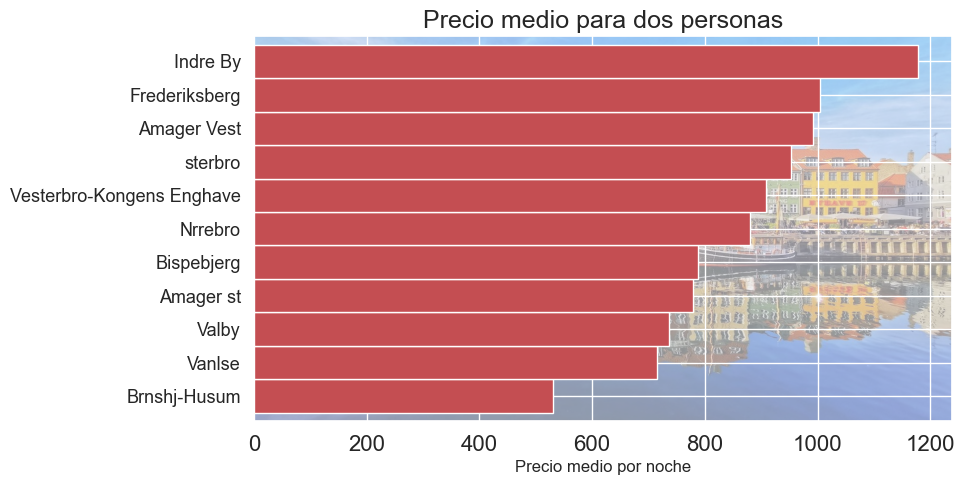

In [618]:
image = mpimg.imread('Copenhague.jpg')
fig, ax = plt.subplots()

feq = listings[listings['accommodates']==2]
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(9, 5), color='r', width=1)

x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.imshow(image, extent=[x0, x1, y0, y1], aspect='auto', alpha=0.4)

plt.title("Precio medio para dos personas", fontsize=18)
plt.xlabel('Precio medio por noche', fontsize=12)
plt.ylabel("")
plt.show()

Podemos ver como el precio más caro se encuentra en el barrio de Indre BY, que es el corazón de Copenhague y su barrio más visitado, seguido de Frederiksberg, uno de los barrios ricos de la ciudad y de Amaguer Vest, otro de los barrios del centro , y los precios más económicos se encuentran en los barrios de la periferia.

- A continuación , podemos ver estos datos reflejados en un mapa, por barrio y precio medio para dos personas:

In [355]:
adam = gpd.read_file("Trabajo Airbnb/neighbourhoods.geojson")
feq = pd.DataFrame([feq])
feq = feq.transpose()
adam = pd.merge(adam, feq, on='neighbourhood', how='left')
adam.rename(columns={'price': 'average_price'}, inplace=True)
adam.average_price = adam.average_price.round(decimals=0)

map_dict = adam.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[55.66344228657138, 12.554676008955472], zoom_start=11)
folium.GeoJson(data=adam,
               name='Copenhaguen',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

4.2. ANÁLISIS POR SEGURIDAD Y VECINDARIO

Debemos indicar que Copenhague es una de las ciudades más seguras de Europa; en 2021, Copenhague fue votada como la ciudad más segura del mundo por diario británico The Economist.

Airbnb no ofrece datos al respecto , como dato de interés haremos referencia al barrio de la ciudad libre de Christiania: el único barrio de Copenhague que pudiera generar inquietud en este aspecto:

Christiania es el segundo lugar más visitado de Dinamarca: La Ciudad Libre de Christiania (Fristaden Christiania) es un espacio de autogobierno que se proclamó independiente de Dinamarca, ubicado en el barrio de Christianshavn.
Esta comuna, que no solo no se considera danesa sino siquiera parte de la Unión Europea (a su salida se advierte que estás entrando en espacio de la UE), cuenta con casi 1.000 vecinos.

Aunque la comunidad de Christiania funciona como un pequeño estado, con su propio gobierno, infraestructuras y comercios, siempre ha sufrido el acoso de la policía danesa, pues desde su nacimiento era uno de los mayores centros de Europa de tráfico de marihuana y otras drogas, no obstante, a día de hoy, es un lugar turístico completamente seguro.

A continuación, mostramos algunas fotos de este pintoresco lugar:

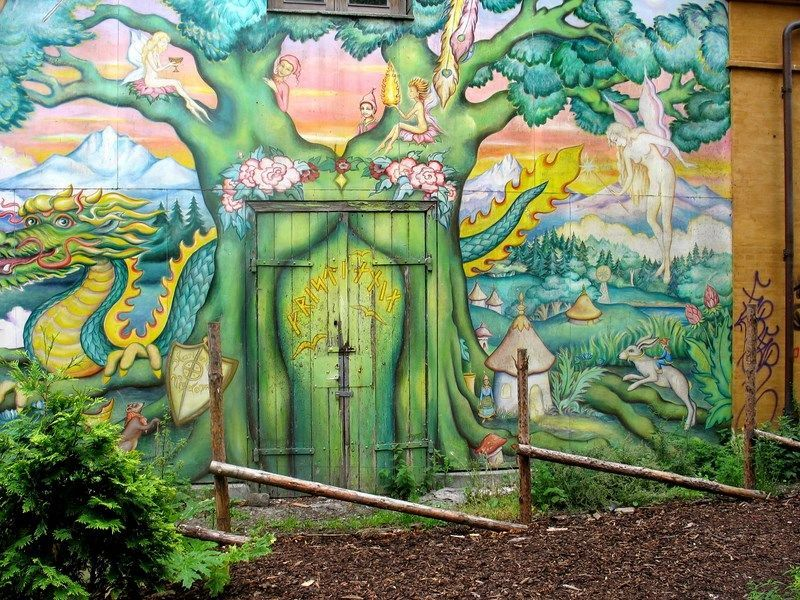

In [359]:
Image(filename='christiania-copenhague.jpg',width=780)

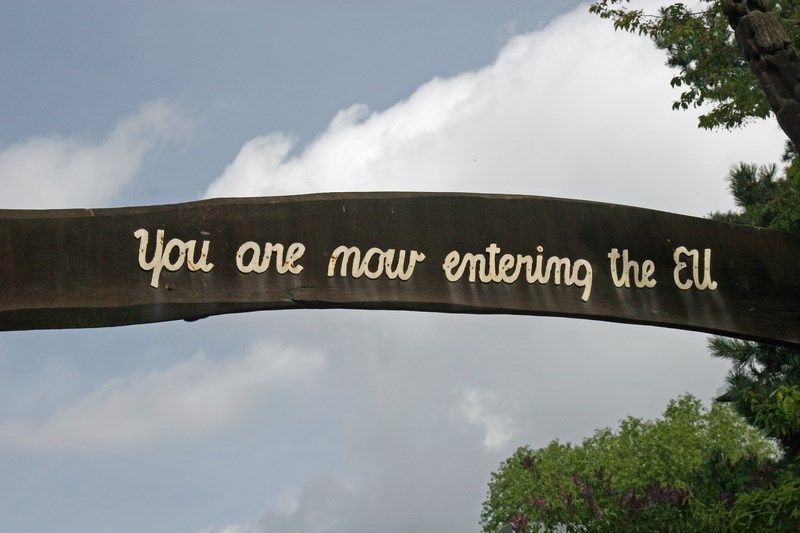

In [360]:
Image(filename='christiania-copenhague-ue.jpg',width=800)

Fotografías obtenidas: https://www.copenhague.es/que-ver/christiania/#lightbox/1/

Para ver más imágenes sobre este peculiar barrio: https://imgur.com/t/copenhagen/v6crpb3

4.3. ANÁLISIS POR REVIEWS

4.3.1 ANÁLISIS DE REVIEWS POR LOCALIZACIÓN

Vamos a ver ahora un análisis por las puntuaciones en las revisiones según la ubicación del vecindario (solo listados con al menos 10 revisiones):

A continuación, vemos que los vecindarios centrales, que como vimos antes son los más caros, también obtienen como es lógico,la puntuación más alta por ubicación, así como los más baratos que vimos estaban en la periferia la peor.

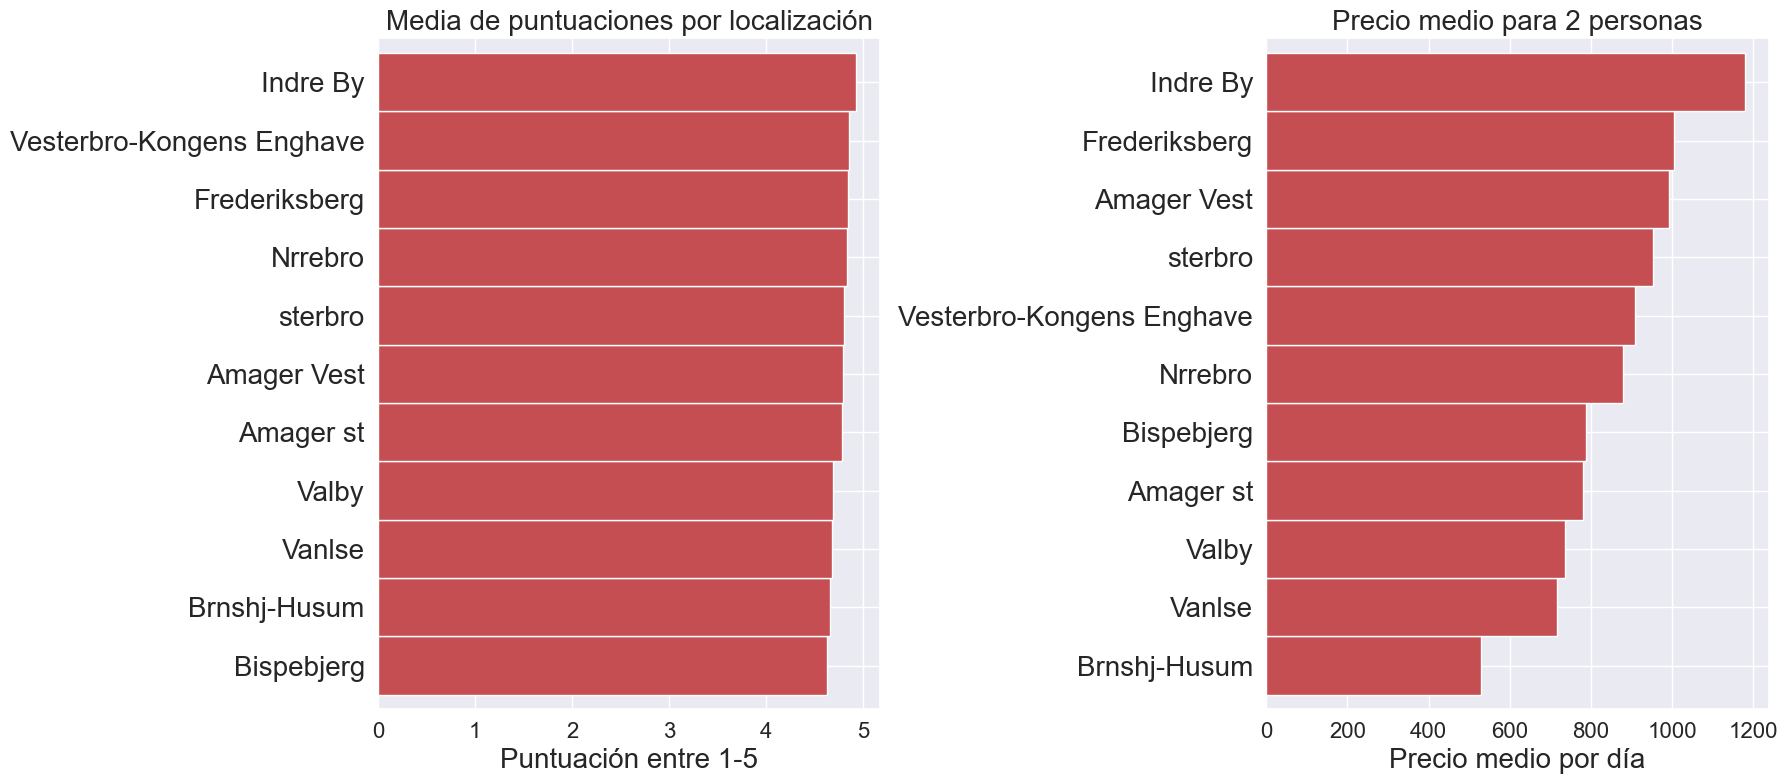

In [552]:
fig = plt.figure(figsize=(18,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq = listings[listings['number_of_reviews']>=10] # filtramos por anuncios con más de 10 reviews.
feq1 = feq.groupby('neighbourhood')['review_scores_location'].mean().sort_values(ascending=True) # buscamos la media
ax1=feq1.plot.barh(color='r', width=1)
plt.title("Media de puntuaciones por localización", fontsize=20)
plt.xlabel('Puntuación entre 1-5', fontsize=20)
plt.ylabel("")

ax2 = fig.add_subplot(122)
feq = listings[listings['accommodates']==2]
feq2 = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
ax2=feq2.plot.barh(color='r', width=1)
plt.title("Precio medio para 2 personas", fontsize=20)
plt.xlabel('Precio medio por día', fontsize=20)
plt.ylabel("")

plt.tight_layout()
plt.show()

Un dato curioso, a tener en cuenta, es que todos los barrios cuentan con unas excelentes reviews, todos por encima del 4.5, debido a que Copenhague, es una ciudad donde todo está relativamente cerca, y aunque la mejor opción para moverse es la bicicleta, tiene una red de transporte público muy eficiente.

4.3.2. ANÁLISIS DE REVIEWS GENERAL

Analizaremos ahora la experiencia general de los usuarios:

-Limpieza. ¿Sentiste que tu espacio estaba limpio y ordenado?

-Precisión. ¿Lo que encontraste fue como lo esperabas según el anuncio?

-Valor. ¿Sentiste que tu hospedaje tenía buena relación calidad-precio?

-Comunicación. ¿Qué tal la comunicación con el anfitrión antes y durante tu estancia?

-Llegada. ¿Cómo fue el registro?

-Ubicación. ¿Cómo te sentiste en el barrio?

- Como tenemos una gran cantidad de anuncios con gran número de reviews, hemos seleccionado los que tienen más de 50 reviews, un número más que suficiente para reflejar la realidad del hospedaje:

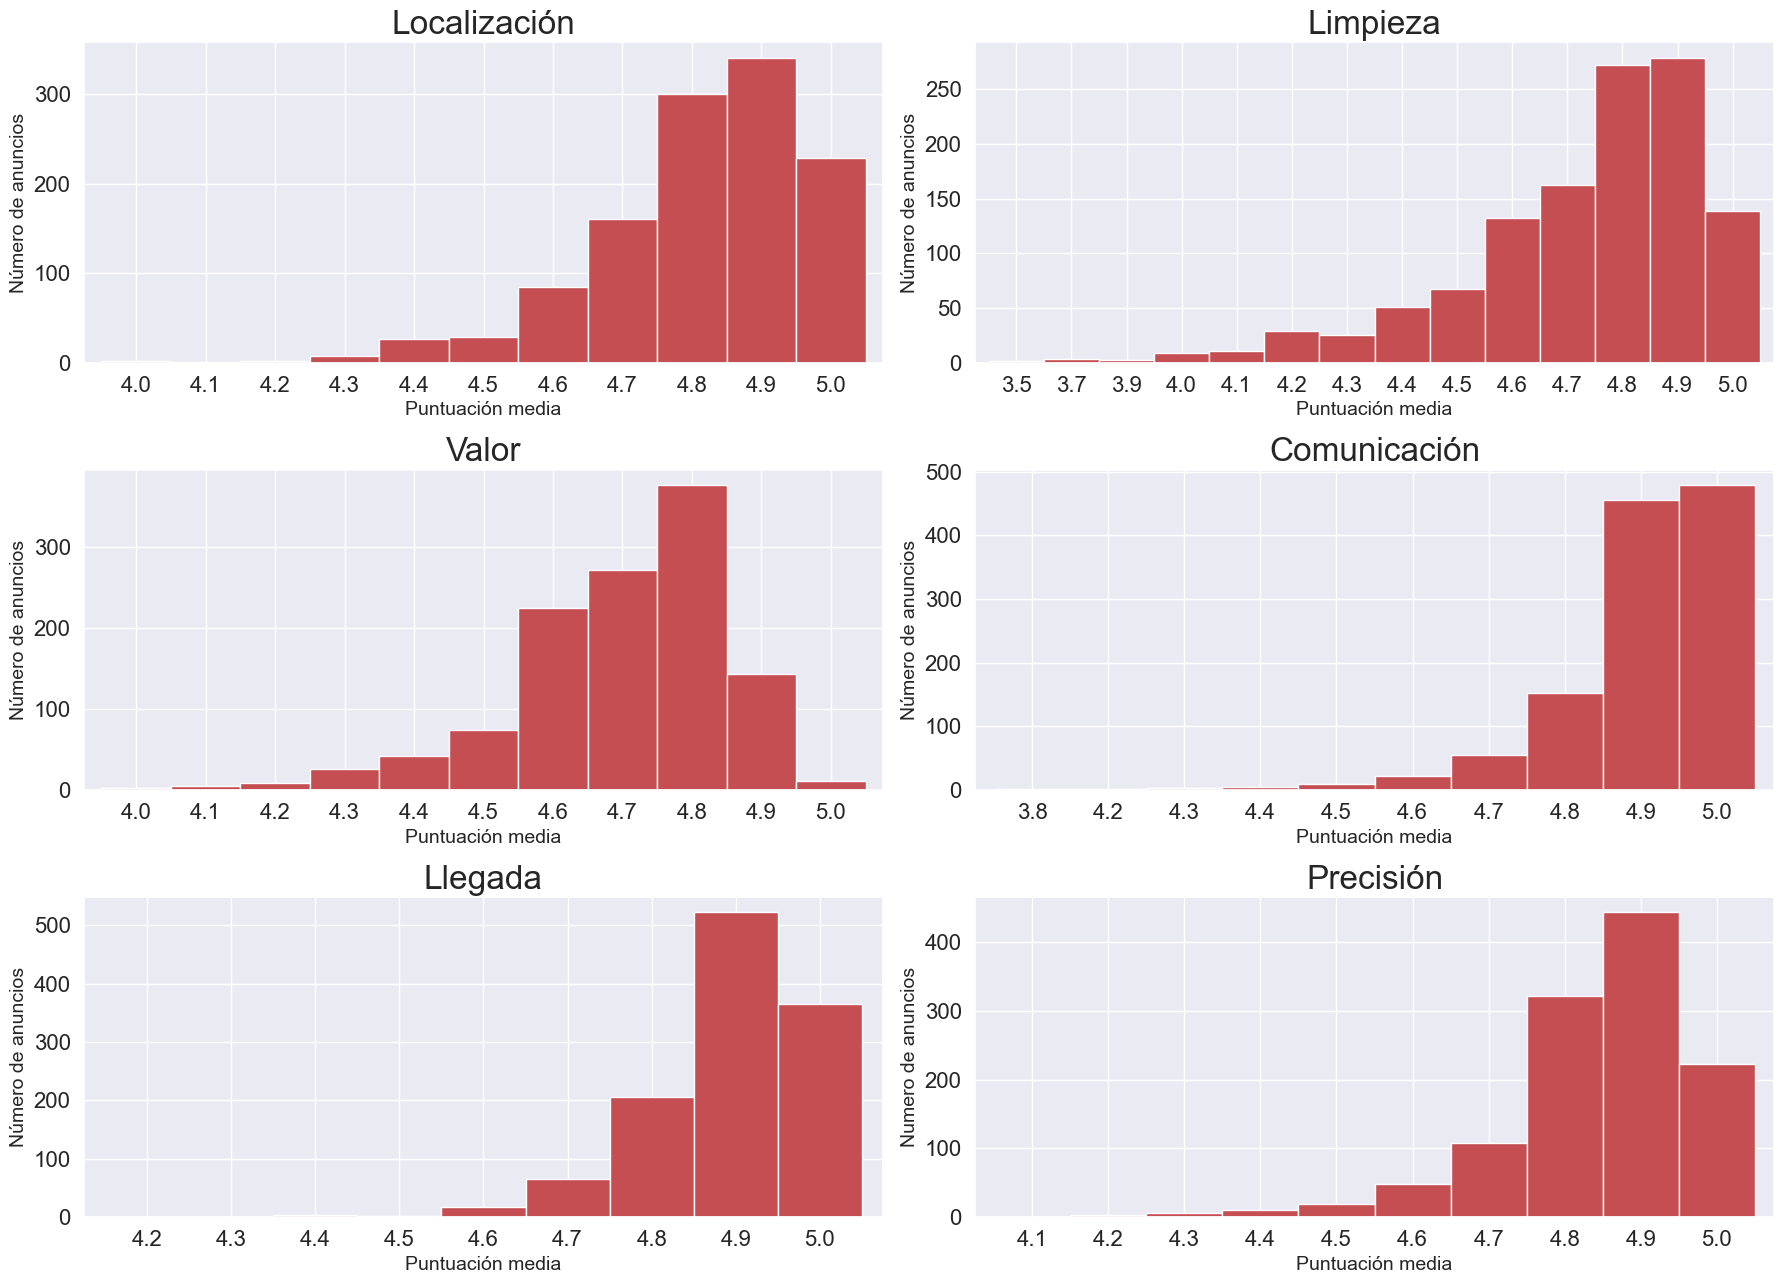

In [553]:
listings50 = listings[listings['number_of_reviews']>=50] # filtramos para seleccionar los anuncios con mas de 50 reviews.

fig = plt.figure(figsize=(18,13))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq=listings50['review_scores_location'].round(1).value_counts().sort_index() # redondeamos a un decimal para agrupar los valores.
ax1=feq.plot.bar(color='r', width=1, rot=0)
plt.title("Localización", fontsize=24)
plt.ylabel('Número de anuncios', fontsize=14)
plt.xlabel('Puntuación media', fontsize=14)

ax2 = fig.add_subplot(322)
feq=listings50['review_scores_cleanliness'].round(1).value_counts().sort_index()
ax2=feq.plot.bar(color='r', width=1, rot=0)
plt.title("Limpieza", fontsize=24)
plt.ylabel('Número de anuncios', fontsize=14)
plt.xlabel('Puntuación media', fontsize=14)

ax3 = fig.add_subplot(323)
feq=listings50['review_scores_value'].round(1).value_counts().sort_index()
ax3=feq.plot.bar(color='r', width=1, rot=0)
plt.title("Valor", fontsize=24)
plt.ylabel('Número de anuncios', fontsize=14)
plt.xlabel('Puntuación media', fontsize=14)

ax4 = fig.add_subplot(324)
feq=listings50['review_scores_communication'].round(1).value_counts().sort_index()
ax4=feq.plot.bar(color='r', width=1, rot=0)
plt.title("Comunicación", fontsize=24)
plt.ylabel('Número de anuncios', fontsize=14)
plt.xlabel('Puntuación media', fontsize=14)

ax5 = fig.add_subplot(325)
feq=listings50['review_scores_checkin'].round(1).value_counts().sort_index()
ax5=feq.plot.bar(color='r', width=1, rot=0)
plt.title("Llegada", fontsize=24)
plt.ylabel('Número de anuncios', fontsize=14)
plt.xlabel('Puntuación media', fontsize=14)

ax6 = fig.add_subplot(326)
feq=listings50['review_scores_accuracy'].round(1).value_counts().sort_index()
ax6=feq.plot.bar(color='r', width=1, rot=0)
plt.title("Precisión", fontsize=24)
plt.ylabel('Numero de anuncios', fontsize=14)
plt.xlabel('Puntuación media', fontsize=14)

plt.tight_layout()
plt.show()

Podemos observar como la gran mayoría de los anuncios tienen reviews por encima del 4.5 en todos los aspectos, lo que nos da una idea general de la gran calidad que tienen los hospedajes en esta ciudad.

4.4 ANÁLISIS POR HOSPEDADOR

4.4.1 ANÁLISIS SUPERHOST

En Airbnb puedes obtener el estatus de "Superhost".

-Los Superanfitriones tienen una calificación general promedio de 4.8 o superior según las reseñas de al menos el 50 % de sus huéspedes de Airbnb durante el último año.

-Los Superhosts han alojado al menos 10 estancias en el último año o, si realizan reservas a más largo plazo, 100 noches en al menos 3 reservas.

-Los Superhosts no tienen cancelaciones en el último año, a menos que haya circunstancias atenuantes.

-Los Superhosts responden al 90 % de los mensajes nuevos en 24 horas.

A continuación, comprobamos cuantos 'Superhost' hay en Copenhage:

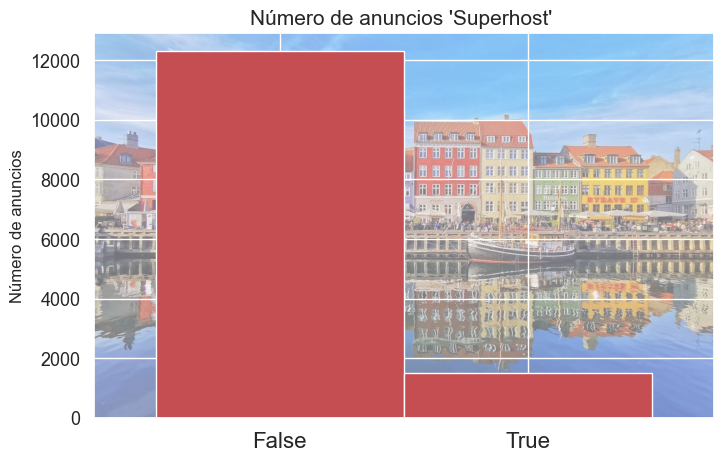

In [620]:
listings.host_is_superhost = listings.host_is_superhost.replace({"t": "True", "f": "False"})

image = mpimg.imread('Copenhague.jpg')
fig, ax = plt.subplots()

feq=listings['host_is_superhost'].value_counts()
feq.plot.bar(figsize=(8, 5), color='r',width=1, rot=0)

x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.imshow(image, extent=[x0, x1, y0, y1], aspect='auto', alpha=0.5)

plt.title("Número de anuncios 'Superhost' ", fontsize=15)
plt.ylabel('Número de anuncios', fontsize=12)
plt.show()

Como podemos ver, solo menos de 2000 anuncios de 12000 son 'Superhost' , a pesar de las gran valoraciones generales que tienen todos los anuncios.

4.4.2 ANÁLISIS POR TIEMPO DE RESPUESTA DEL HOSPEDADOR

Si tuviéramos que reservar alojamiento, no buscaríamos necesariamente un superhost, ya que el superhost probablemente aumentará su precio. 

Vamos a ver como responden los anfitriones en los anuncios con más de 50 reseñas:
 

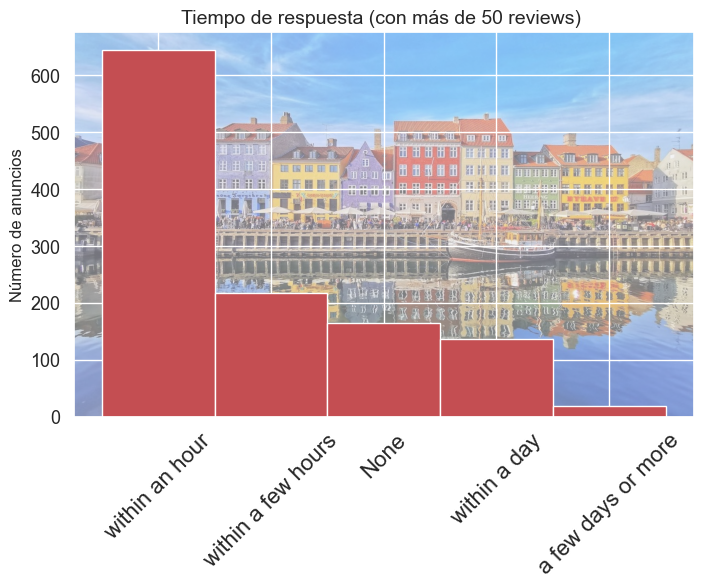

In [621]:
image = mpimg.imread('Copenhague.jpg')
fig, ax = plt.subplots()

feq2 = listings50['host_response_time'].value_counts()
ax2=feq2.plot.bar(figsize=(8, 5),color='r', width=1, rot=45)

x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.imshow(image, extent=[x0, x1, y0, y1], aspect='auto', alpha=0.5)

plt.title("Tiempo de respuesta (con más de 50 reviews) ", fontsize=14)
plt.ylabel("Número de anuncios")
plt.show()

Podemos ver que la gran mayoría de ellos responden en menos de una hora, y muy pocos tardan más de 24 horas, por lo que podemos considerar a estos anfitriones como buenos hospedadores.

4.5. ANÁLISIS POR DISPONIBLIDAD

El dataset 'calendar' contiene 365 registros para cada anuncio, con el precio y la disponibilidad por fecha.

In [556]:
calendar.head() # comprobamos 'calendar'

date available    price adjusted_price  minimum_nights  \
listing_id                                                                
6983       2022-09-24         f  $953.00        $953.00             3.0   
6983       2022-09-25         f  $877.00        $877.00             3.0   
6983       2022-09-26         f  $877.00        $877.00             3.0   
6983       2022-09-27         f  $877.00        $877.00             3.0   
6983       2022-09-28         f  $877.00        $877.00             3.0   

            maximum_nights  
listing_id                  
6983                  15.0  
6983                  15.0  
6983                  15.0  
6983                  15.0  
6983                  15.0

In [557]:
calendar['price'] = calendar['price'].str.strip('$') # eliminamos el símbolo del $ en precio

In [558]:
calendar.head() # comprobamos que se ha eliminado

date available   price adjusted_price  minimum_nights  \
listing_id                                                               
6983       2022-09-24         f  953.00        $953.00             3.0   
6983       2022-09-25         f  877.00        $877.00             3.0   
6983       2022-09-26         f  877.00        $877.00             3.0   
6983       2022-09-27         f  877.00        $877.00             3.0   
6983       2022-09-28         f  877.00        $877.00             3.0   

            maximum_nights  
listing_id                  
6983                  15.0  
6983                  15.0  
6983                  15.0  
6983                  15.0  
6983                  15.0

In [559]:
calendar.dtypes # comprobamos que tipos de datos contiene, vemos que la columna 'price' es de tipo objeto, vamos a modificarla a numérica

date              datetime64[ns]
available                 object
price                     object
adjusted_price            object
minimum_nights           float64
maximum_nights           float64
dtype: object

In [560]:
calendar["price"]=calendar["price"].str.replace(',', '') # eliminamos las comas en los números

In [561]:
calendar['price'] = pd.to_numeric(calendar['price']) # convertimos a numérica esta columna

In [562]:
calendar['price'] # comprobamos los cambios en la columna

listing_id
6983      953.0
6983      877.0
6983      877.0
6983      877.0
6983      877.0
          ...  
401665    750.0
401665    750.0
401665    750.0
401665    750.0
401665    750.0
Name: price, Length: 5040296, dtype: float64

A continuación, mostramos los datos del calendario donde la disponibilidad FALSE significa que el propietario no quiere alquilar su propiedad en la fecha específica o que la lista ya se ha reservado para esa fecha. 

Para poder analizar el dataset 'listings' con 'calendar' los unimos por la columna 'accommodates' :

In [563]:
listings.index.name = "listing_id"
calendar = pd.merge(calendar, listings[['accommodates']], on = "listing_id", how = "left") # unimos ambos datasets por el 'id'
calendar.sample(5)  # comprobamos como ha quedado 'calendar'

date available   price adjusted_price  minimum_nights  \
listing_id                                                               
50353399   2023-07-28         f   850.0        $850.00             1.0   
31850234   2022-12-08         f   400.0        $400.00             2.0   
4690553    2023-02-09         f  1339.0      $1,339.00             1.0   
10581642   2023-06-10         f   895.0        $895.00             2.0   
28090269   2022-12-10         f  1000.0      $1,000.00             2.0   

            maximum_nights  accommodates  
listing_id                                
50353399             365.0             3  
31850234            1125.0             2  
4690553             1125.0             1  
10581642            1125.0             3  
28090269            1125.0             2

A continuación, vemos un gráfico interactivo , que nos mostrará la disponibiliad si pasamos el cursor sobre los puntos, con el número de anuncios disponibles y el día de la semana por fecha desde la actualidad en adelante:

In [572]:
import plotly.io as pio

sum_available = calendar[calendar.available == "t"].groupby(['date']).size().to_frame(name= 'available').reset_index()
sum_available['weekday'] = sum_available['date'].dt.day_name()
sum_available = sum_available.set_index('date')

sum_available.iplot(y='available', mode = 'lines', xTitle = 'Fecha', yTitle = 'Número de anuncios disponibles',\
                   text='weekday', title = 'Número de anuncios disponibles por fecha',color='#FF0000')

4.6 ANÁLISIS POR PRECIO

Para poner en contexto este análisis, se hace necesario indicar que Copenhague está entre las ciudades más caras del mundo para vivir, como podemos ver en el siguiente estudio, que hemos obtenido del último informe mundial del 2022, en el que se indica el top 10 de las ciudades más caras del mundo para vivir:

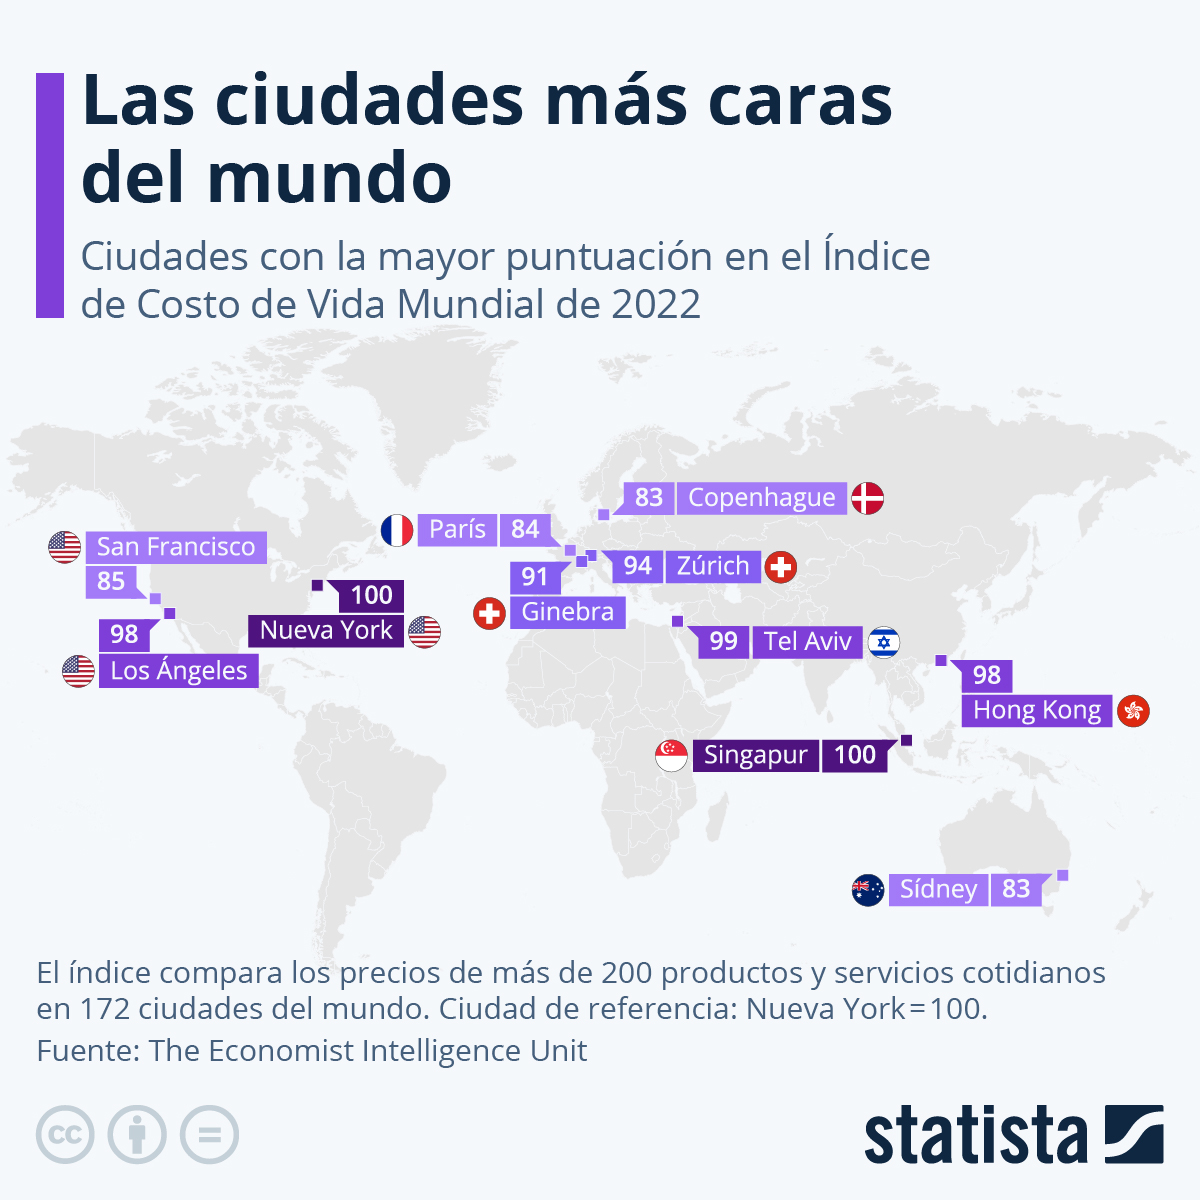

In [585]:
Image(filename='ciudades_mascaras.jpeg',width=800)

Fuente y más información: https://es.statista.com/grafico/26316/ciudades-con-la-mayor-puntuacion-en-el-indice-de-costo-de-vida-mundial/

Un trabajador danés cobra un salario medio neto de 24.000 coronas danesas, que equivale aproximadamente a 3.220 euros al mes. 
El coste de la vida en Dinamarca se sitúa entre los 1.530 y los 1.760 euros mensuales.
Eso sí, Copenhague, es uno de los lugares con mayor calidad de vida según el Índice de Felicidad de las Naciones Unidas.

Para más información: https://laderasur.com/articulo/como-copenhague-llego-ser-una-de-las-ciudades-mas-felices-del-mundo/

Teniendo todo esto en cuenta, veamos ahora un gráfico con el precio medio por alojamientos para dos personas que se encuentran disponibles por fechas, es interactivo, al pasar el curso sobre los puntos, se mostrará la información sobre el precio medio y el día de la semana por fecha:

In [574]:
average_price = calendar[(calendar.available == "t") & (calendar.accommodates == 2)].groupby(['date']).mean().astype(np.int64).reset_index()
average_price['weekday'] = average_price['date'].dt.day_name()
average_price = average_price.set_index('date')

average_price.iplot(y='price', mode='lines', xTitle='Fecha', yTitle='Precio',
    text='weekday', title='Precio medio para dos personas por fecha',color='#FF0000' )

Podemos ver el pico reciente más alto el 31 de diciembre, por la época de Navidad y una bajada de enero en adelante, pero con una media de precios en torno a los 1000$; las subidas y bajadas se deben a las subidas que experimentan los precios en los fines de semana; aunque como podemos ver los precios son muy elevados, si que podemos encontrar en Airbnb alojamientos por unos 40-50 euros la noches por persona.

5. MINERÍA DE TEXTO CON LAS REVIEWS

Fusionamos los datasets 'reviews_details' con 'listings' , para obtener más información adicional:

In [586]:
reviews_details = pd.merge(reviews_details, listings[['host_id', 'host_name', 'name']], on = "listing_id", how = "left") # unimos datasets
reviews_details = reviews_details.set_index('id')
reviews_details = reviews_details[['listing_id', 'name', 'host_id', 'host_name', 'date', 'reviewer_id', 'reviewer_name', 'comments']]
reviews_details.head() # mostramos dataset final

listing_id  \
id                               
678806182273584966      406081   
1191845                 409625   
8985                      6983   
9199                      6983   
11763                     6983   

                                                                 name  \
id                                                                      
678806182273584966  197m2! Beautiful apartment (family cargobike i...   
1191845                                 Small Penthouse with balcony.   
8985                                             Copenhagen 'N Livin'   
9199                                             Copenhagen 'N Livin'   
11763                                            Copenhagen 'N Livin'   

                      host_id host_name       date  reviewer_id reviewer_name  \
id                                                                              
678806182273584966  2023659.0    Mikael 2022-07-25    109349541       Leilani   
1191845             2038200.0      Lars 2012-04-28      2084648         Laura   
8985                  16774.0     Simon 2009-09-04        31133          Jeff   
9199                  16774.0     Simon 2009-09-07        11472        Andrea   
11763                 16774.0     Simon 2009-09-28        35317       Jeanine   

                                                             comments  
id                                                                     
678806182273584966  Beautiful home, excellent location. Grocery st...  
1191845             Lars was a fantastic host - he was really help...  
8985                Convenient location, clean apartment, great br...  
9199                We really enjoyed staying to Simon in our firs...  
11763               Friendly host, save neighbourhood, clean appar...

Comprobamos los 5 hosts con más reseñas:

In [587]:
host_reviews = reviews_details.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).to_frame(name = "number_of_reviews")
host_reviews.head()

number_of_reviews
host_id     host_name                         
34105860.0  Den                           1582
2806924.0   Into This Place               1183
8602749.0   Myne                          1152
799887.0    Bente                         1115
331283054.0 Aperon                        1052

Vemos los comentarios que se indican en estos hosts: 

In [588]:
reviews_details.comments.head()

id
678806182273584966    Beautiful home, excellent location. Grocery st...
1191845               Lars was a fantastic host - he was really help...
8985                  Convenient location, clean apartment, great br...
9199                  We really enjoyed staying to Simon in our firs...
11763                 Friendly host, save neighbourhood, clean appar...
Name: comments, dtype: object

In [589]:
reviews_details.comments.values[2]

"Convenient location, clean apartment, great breakfast...couldn't have asked for more. Best value in lodging in all of Copenhagen. "

In [590]:
import nltk # para hacer la nube de palabras

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elena\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [591]:
# tomará comentarios:
reviews_details = reviews_details[reviews_details['comments'].notnull()]
# remove numbers
reviews_details['comments'] = reviews_details['comments'].str.replace('\d+', '') 
# all to lowercase
reviews_details['comments'] = reviews_details['comments'].str.lower()
# remove windows new line
reviews_details['comments'] = reviews_details['comments'].str.replace('\r\n', "")
# stopwords 
stop_english = stopwords.words("english")
reviews_details['comments'] = reviews_details['comments'].apply(lambda x: " ".join([i for i in x.split() 
            if i not in (stop_english)]))
# remove punctuation
reviews_details['comments'] = reviews_details['comments'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
reviews_details['comments'] = reviews_details['comments'].str.replace('\s+', ' ')

reviews_details.comments.values[2] #print same comments again

'convenient location clean apartment great breakfast couldn t asked more best value lodging copenhagen '

Veamos cómo implementar un conteo de palabras y emplearlo para crear un *wordcloud* :

In [592]:
texts = reviews_details.comments.tolist()

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
cvec_df.head(10)

words  counts
56           br  155075
43    apartment  118463
44        great  106532
70         stay   85457
58        place   80803
3      location   72259
109        nice   66663
40   copenhagen   62440
19         host   52970
42        clean   48006

Creamos nubes de palabras con los colores de la bandera danesa: 

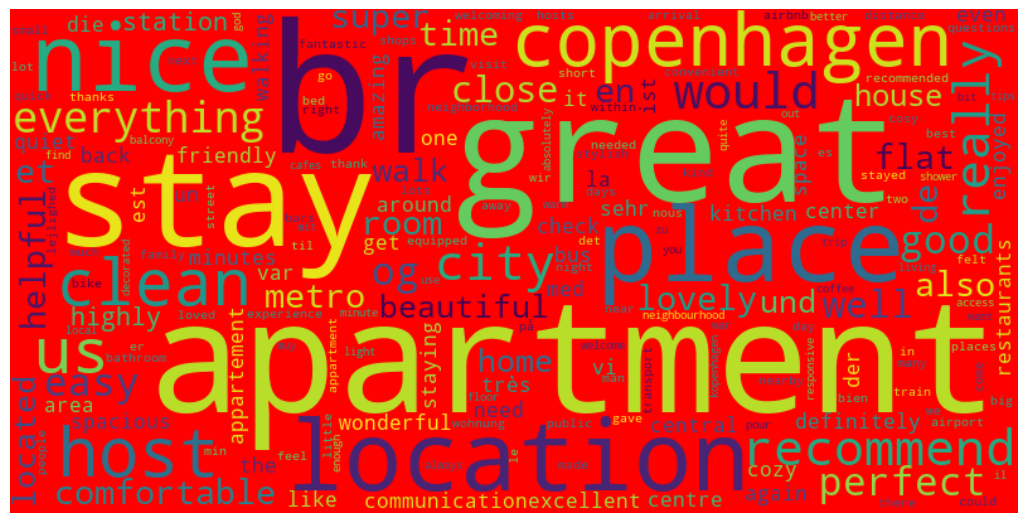

In [639]:
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(width=800, height=400, background_color='red')
wordcloud.generate_from_frequencies(frequencies=cvec_dict)

plt.figure( figsize=(13,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

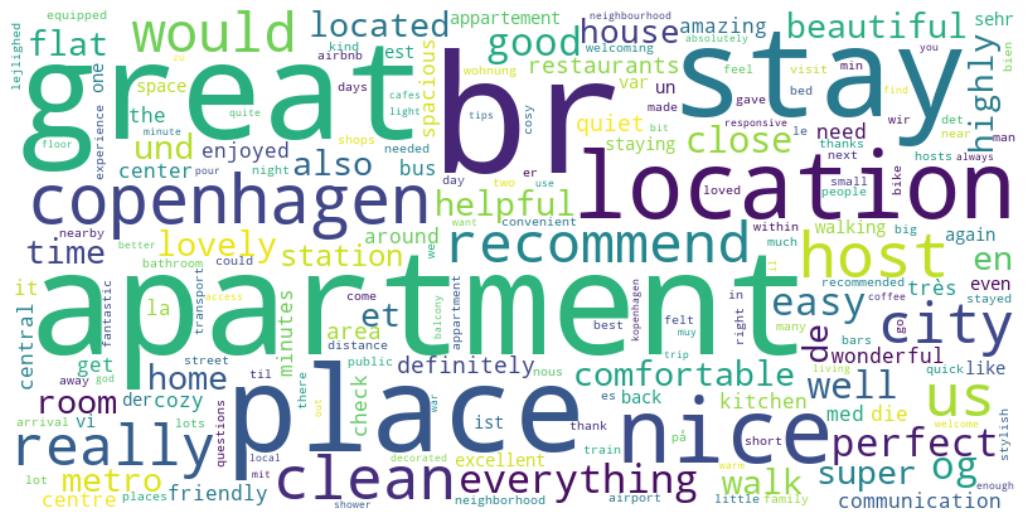

In [641]:
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(frequencies=cvec_dict)

plt.figure( figsize=(13,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

6. CONCLUSIONES

Tras haber analizado los alojamientos que se ofrecen en Airbnb en Copenhague, podemos indicar que:

Atendiendo al alto nivel de vida que tienen los daneses, los hospedajes tienen un elevado coste, no obstante, estos son de una excelente calidad con muy altas puntuaciones en todos los aspectos valorables.

Todos los barrios son excepcionalmente seguros, nos encontramos en una de las ciudades más seguras del mundo.

El coste de la vida en Copenhague es elevado, has de tener esto en cuenta en tu viaje.

No tendrás problemas con tus alojamientos, en Dinamarca hay un fuerte sentido de comunidad y altos niveles de compromiso cívico.

Y no olvides cambiar tus euros por coronas danesas! 

7. RECOMENDACIONES

Asumiendo lo anterior, os invitamos a viajar a Copenhague y conocer el país que obtiene uno de los mejores resultados en bienestar general y satisfacción ante la vida.

Aunque el dinero no puede comprar la felicidad, es un medio importante para lograr estándares de vida más elevados y Dinamarca según el último informe
publicado del año 2022, es el tercer país del mundo con mayor salario medio: 5877 euros, como vemos a continuación :

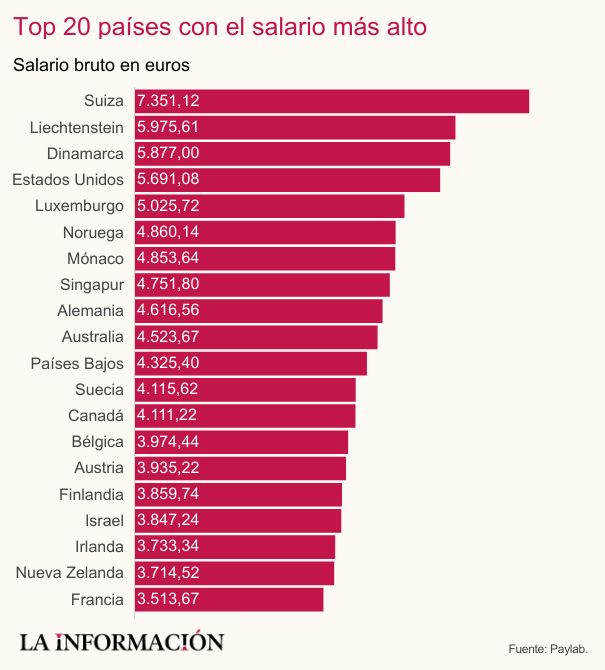

In [643]:
Image(filename='mejores_salarios.jpg',width=800)

Fuente y más información https://www.lainformacion.com/management/paises-mundo-sueldos-mas-altos-euros-mes/2877503/#:~:text=Liechtenstein%2C%20con%205.976